In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/AIVLE/제4회 AI SPARK 공모전/train_data.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/AIVLE/제4회 AI SPARK 공모전/test_data.csv')

# MinMaxScaler를 이용해 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# PCA 선언
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=2023)

# TSNE 선언
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=2023)

#### 전체 데이터 pca 시각화 (train, test data)

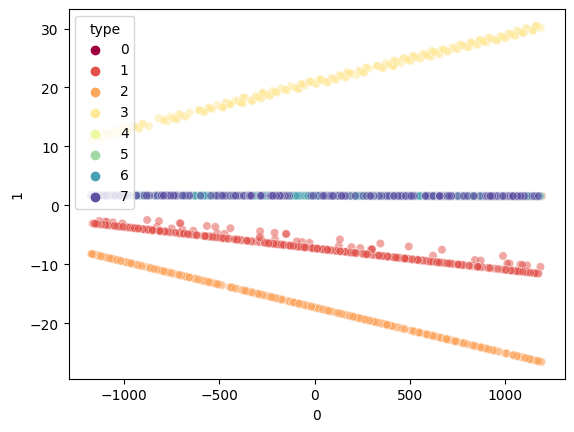

In [ ]:
# train data : scaling x, pca
train_pca = pca.fit_transform(train.drop(['out_pressure','type'], axis=1))
train_pca = pd.DataFrame(train_pca)
train_pca = pd.concat([train_pca, train['type']], axis=1)

sns.scatterplot(x=train_pca[0], y=train_pca[1], data=train_pca, hue='type', palette='Spectral', legend='full', alpha=0.5)
plt.show()

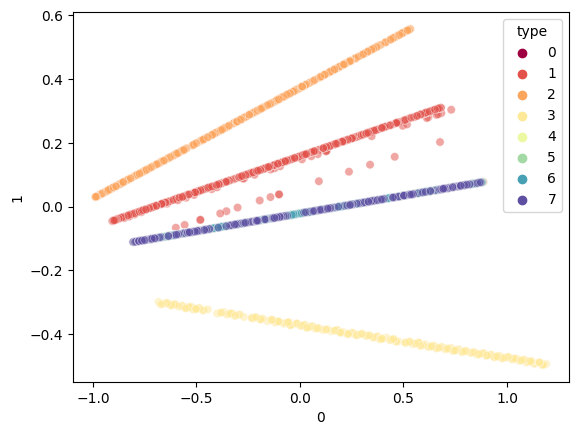

In [ ]:
# train data : scaling o, pca
train_scaled_pca = pca.fit_transform(scaler.fit_transform(train.drop(['out_pressure','type'], axis=1)))
train_scaled_pca = pd.DataFrame(train_scaled_pca)
train_scaled_pca = pd.concat([train_scaled_pca, train['type']], axis=1)

sns.scatterplot(x=train_scaled_pca[0], y=train_scaled_pca[1], data=train_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

[]

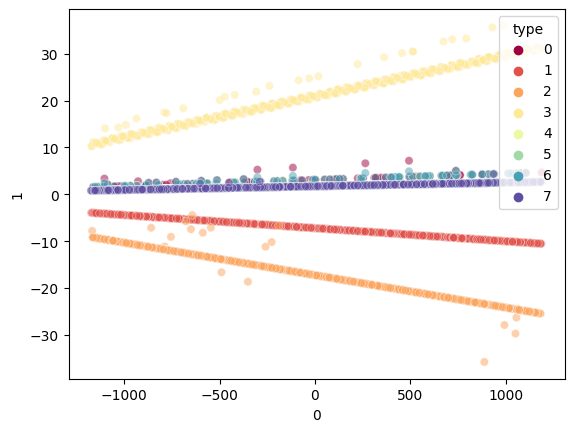

In [ ]:
# test data : scaling x, pca
test_pca = pca.fit_transform(test.drop(['out_pressure','type'], axis=1))
test_pca = pd.DataFrame(test_pca)
test_pca = pd.concat([test_pca, test['type']], axis=1)

sns.scatterplot(x=test_pca[0], y=test_pca[1], data=test_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.plot()

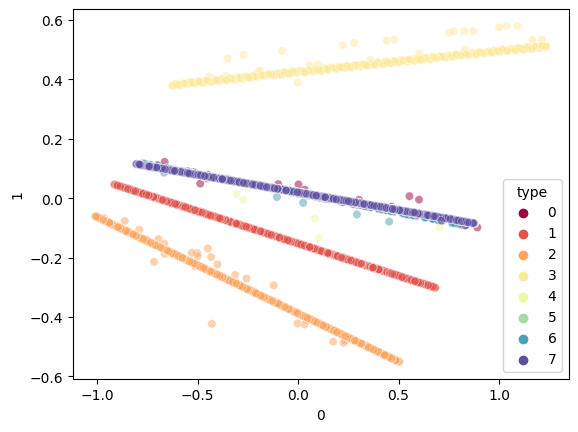

In [ ]:
# test data : scaling o, pca
test_scaled_pca = pca.fit_transform(scaler.fit_transform(test.drop(['out_pressure','type'], axis=1)))
test_scaled_pca = pd.DataFrame(test_scaled_pca)
test_scaled_pca = pd.concat([test_scaled_pca, test['type']], axis=1)

sns.scatterplot(x=test_scaled_pca[0], y=test_scaled_pca[1], data=test_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

#### test, train 합쳐서 pca 시각화
1. type 0, 1, 2, 3, 4, 5, 6, 7 모두 나눠서 시각화
2. 왼쪽은 scaling 미적용, 오른쪽은 scaling 적용
3. train 데이터에 linear regression 적용하여 일차방정식 생성
4. test 데이터와 비교하여 diff 차이가 많이 나면 이상치 판단

In [4]:
# 타입 별로 train data + test data
all0 = pd.concat([train[train['type']==0], test[test['type']==0]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all1 = pd.concat([train[train['type']==1], test[test['type']==1]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all2 = pd.concat([train[train['type']==2], test[test['type']==2]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all3 = pd.concat([train[train['type']==3], test[test['type']==3]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all4 = pd.concat([train[train['type']==4], test[test['type']==4]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all5 = pd.concat([train[train['type']==5], test[test['type']==5]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all6 = pd.concat([train[train['type']==6], test[test['type']==6]], axis=0).reset_index(drop=True).drop(['type'], axis=1)
all7 = pd.concat([train[train['type']==7], test[test['type']==7]], axis=0).reset_index(drop=True).drop(['type'], axis=1)

##### type 0

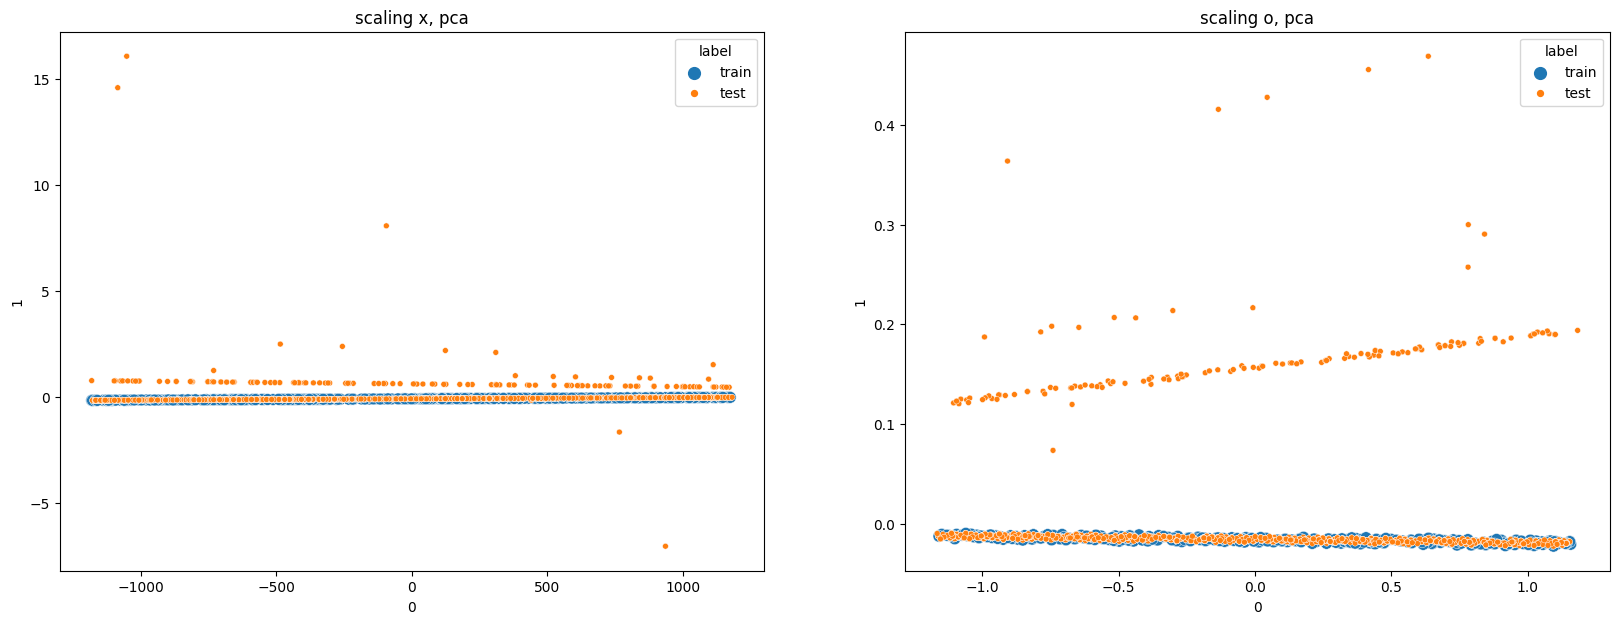

In [5]:
# all0 : pca(scaling x / scaling o)
all0_pca = pca.fit_transform(all0)
all0_pca = pd.DataFrame(all0_pca)
all0_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all0_pca[0], y=all0_pca[1], data=all0_pca, hue='label', size='label')
plt.title('scaling x, pca')

all0_scaled_pca = pca.fit_transform(scaler.fit_transform(all0))
all0_scaled_pca = pd.DataFrame(all0_scaled_pca)
all0_scaled_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.subplot(1,2,2)
sns.scatterplot(x=all0_scaled_pca[0], y=all0_scaled_pca[1], data=all0_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [6]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train0_scaled_pca = all0_scaled_pca[all0_scaled_pca['label']=='train']
test0_scaled_pca = all0_scaled_pca[all0_scaled_pca['label']=='test']

reg0 = LinearRegression()
reg0.fit(train0_scaled_pca[0].values.reshape(-1,1), train0_scaled_pca[1])

test0_scaled_pca['diff'] = abs(reg0.coef_ * test0_scaled_pca[0] + reg0.intercept_ - test0_scaled_pca[1])

<ipython-input-6-b408f8e10e56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test0_scaled_pca['diff'] = abs(reg0.coef_ * test0_scaled_pca[0] + reg0.intercept_ - test0_scaled_pca[1])


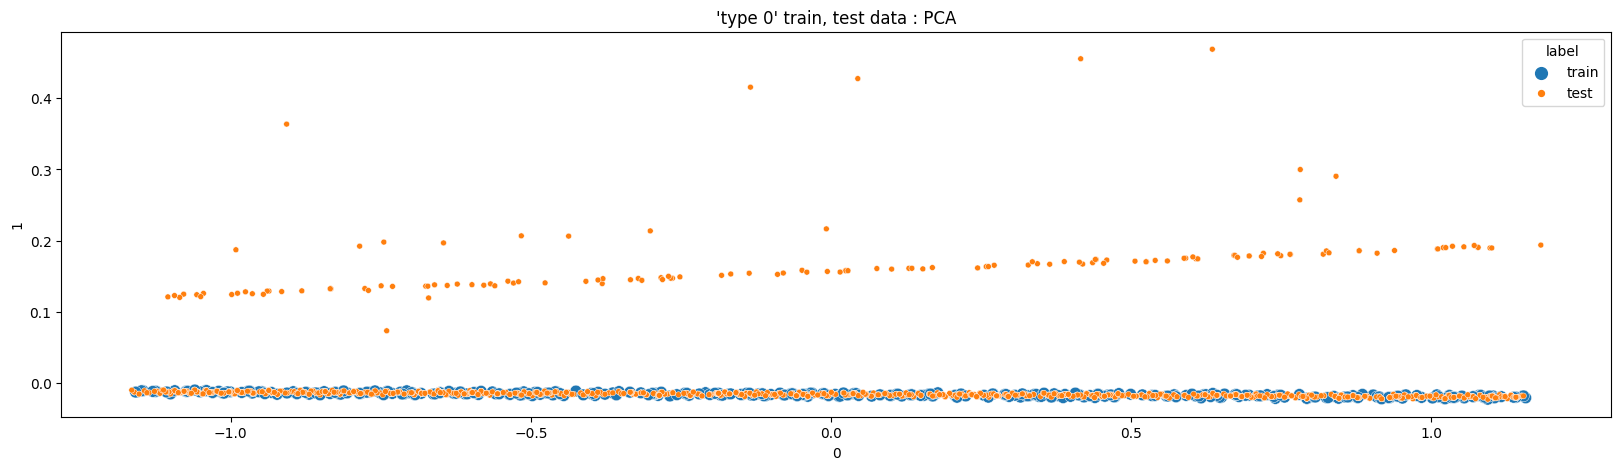

In [10]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,5))
sns.scatterplot(x=all0_scaled_pca[0], y=all0_scaled_pca[1], data=all0_scaled_pca, hue='label', size='label')
#plt.plot(X, reg0.coef_ * X + reg0.intercept_, color='red')
#plt.ylim([-0.025,-0.005])
plt.title("'type 0' train, test data : PCA")
plt.show()

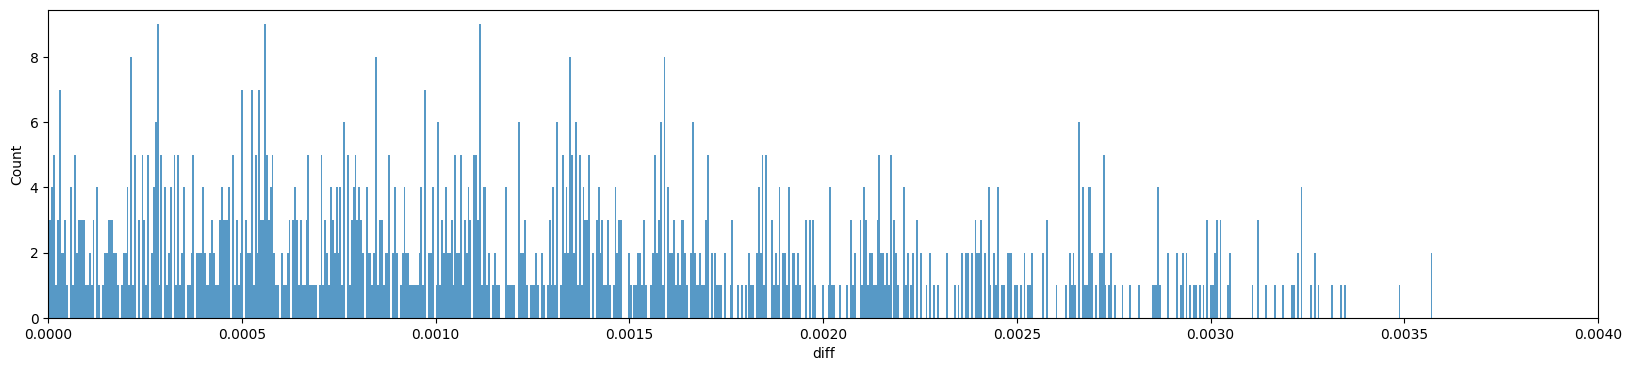

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test0_scaled_pca, bins=100000)
plt.xlim([0,0.004])
plt.show() # 0.004 이상이면 이상치

In [ ]:
# 이상치 판단
test0_scaled_pca['label'] = np.where(test0_scaled_pca['diff'] > 0.004, 1, 0)
test0_scaled_pca['label'].value_counts()

<ipython-input-6-c03e27adad15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test0_scaled_pca['label'] = np.where(test0_scaled_pca['diff'] > 0.004, 1, 0)


0    1153
1     143
Name: label, dtype: int64

In [ ]:
test0_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==0].drop('type', axis=1)))
test0_scaled_tsne = pd.DataFrame(test0_scaled_tsne)
test0_scaled_tsne.index = test0_scaled_pca.index
test0_scaled_tsne = pd.concat([test0_scaled_tsne, test0_scaled_pca['label']], axis=1)
test0_scaled_tsne['size'] = np.where(test0_scaled_tsne['label']==1, 10, 4)

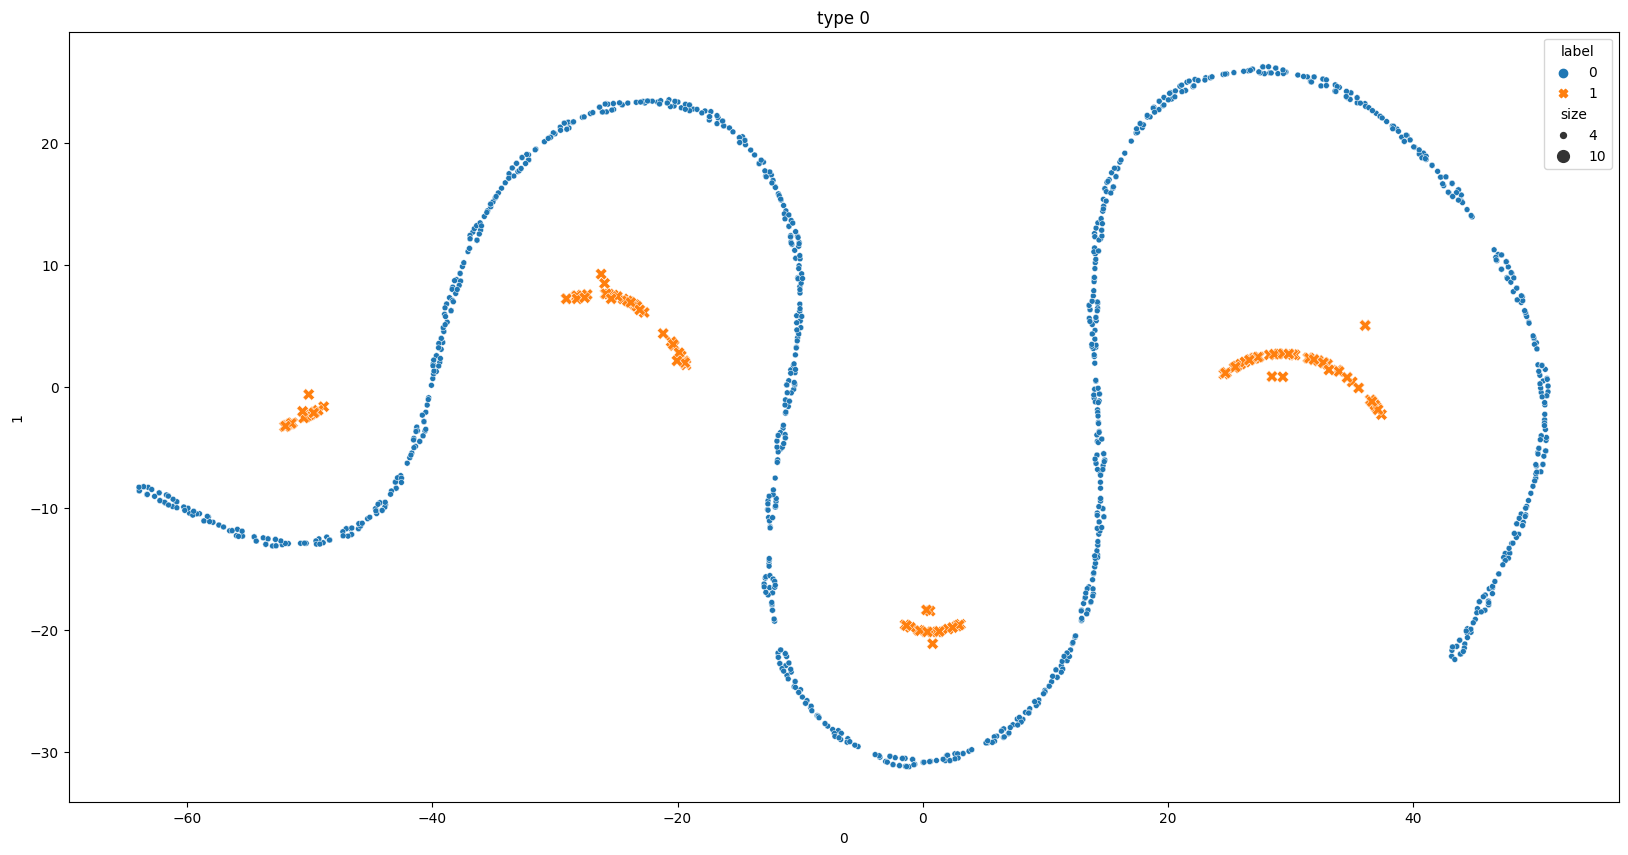

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test0_scaled_tsne[0], y=test0_scaled_tsne[1], data=test0_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 0')
plt.show()

##### type 1

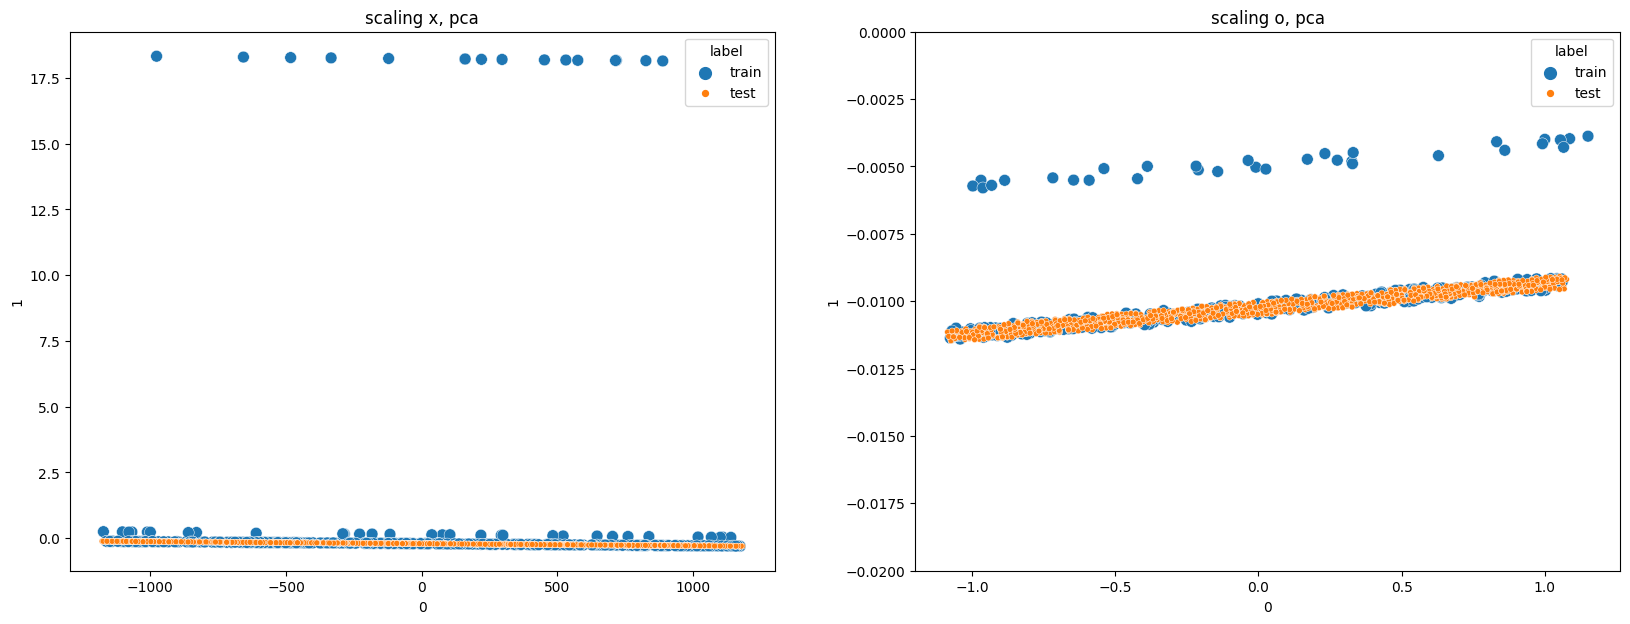

In [11]:
# all1 : pca(scaling x / scaling o)
all1_pca = pca.fit_transform(all1)
all1_pca = pd.DataFrame(all1_pca)
all1_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all1_pca[0], y=all1_pca[1], data=all1_pca, hue='label', size='label')
plt.title('scaling x, pca')

all1_scaled_pca = pca.fit_transform(scaler.fit_transform(all1))
all1_scaled_pca = pd.DataFrame(all1_scaled_pca)
all1_scaled_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.subplot(1,2,2)
sns.scatterplot(x=all1_scaled_pca[0], y=all1_scaled_pca[1], data=all1_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.ylim([-0.02,0])
#plt.xlim([-0.1,0.1])
plt.show()

In [12]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train1_scaled_pca = all1_scaled_pca[all1_scaled_pca['label']=='train']
test1_scaled_pca = all1_scaled_pca[all1_scaled_pca['label']=='test']

# type1은 test data에 대한 회귀식 생성
reg1 = LinearRegression()
reg1.fit(test1_scaled_pca[0].values.reshape(-1,1), test1_scaled_pca[1])

train1_scaled_pca['diff'] = abs(reg1.coef_ * train1_scaled_pca[0] + reg1.intercept_ - train1_scaled_pca[1])

<ipython-input-12-813659a83539>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_scaled_pca['diff'] = abs(reg1.coef_ * train1_scaled_pca[0] + reg1.intercept_ - train1_scaled_pca[1])


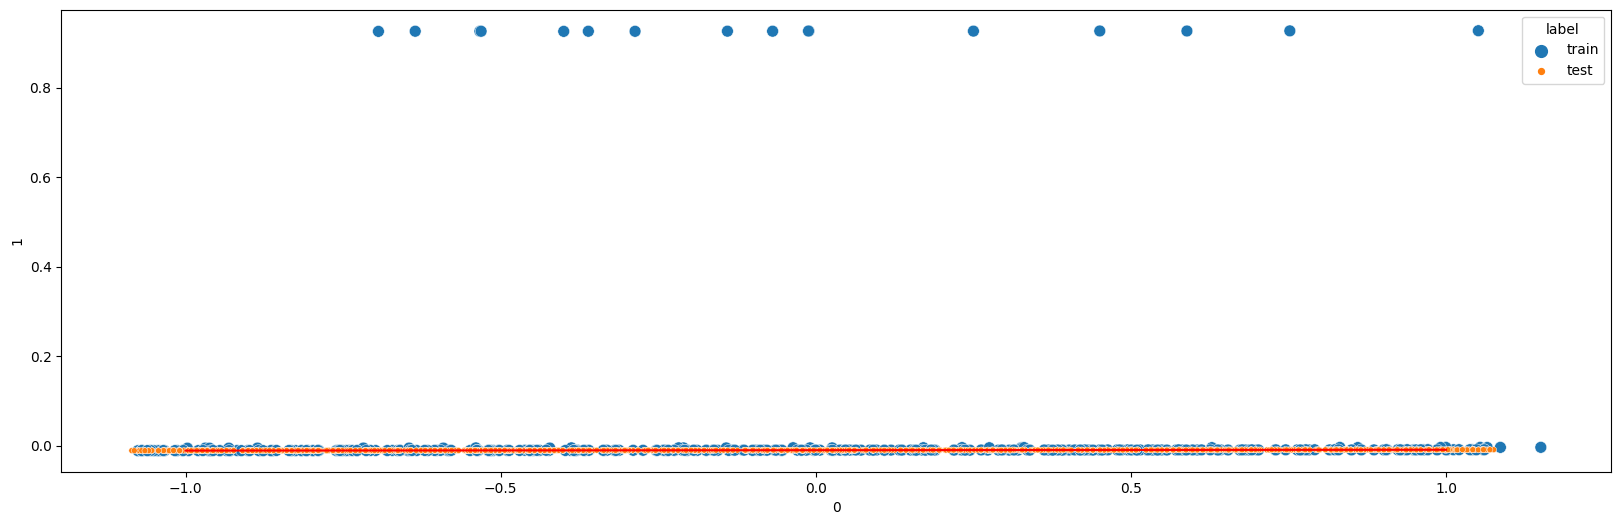

In [13]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all1_scaled_pca[0], y=all1_scaled_pca[1], data=all1_scaled_pca, hue='label', size='label')
plt.plot(X, reg1.coef_ * X + reg1.intercept_, color='red')
#plt.ylim([-0.01,-0.0085])
#plt.xlim([1.0,1.5])
plt.show()

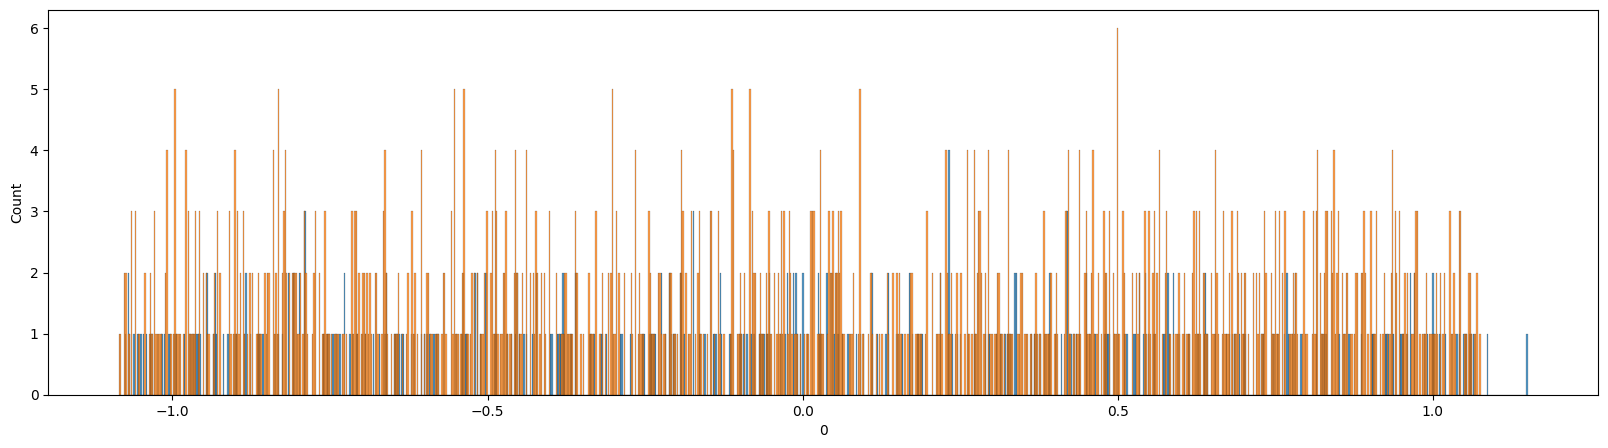

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(train1_scaled_pca[0], bins=1000)
sns.histplot(test1_scaled_pca[0], bins=1000)
plt.show()

In [ ]:
train1_scaled_pca[train1_scaled_pca[0] > test1_scaled_pca[0].max()]

0         1  label      diff
128  1.086255 -0.003968  train  0.005293
135  1.150396 -0.003876  train  0.005325

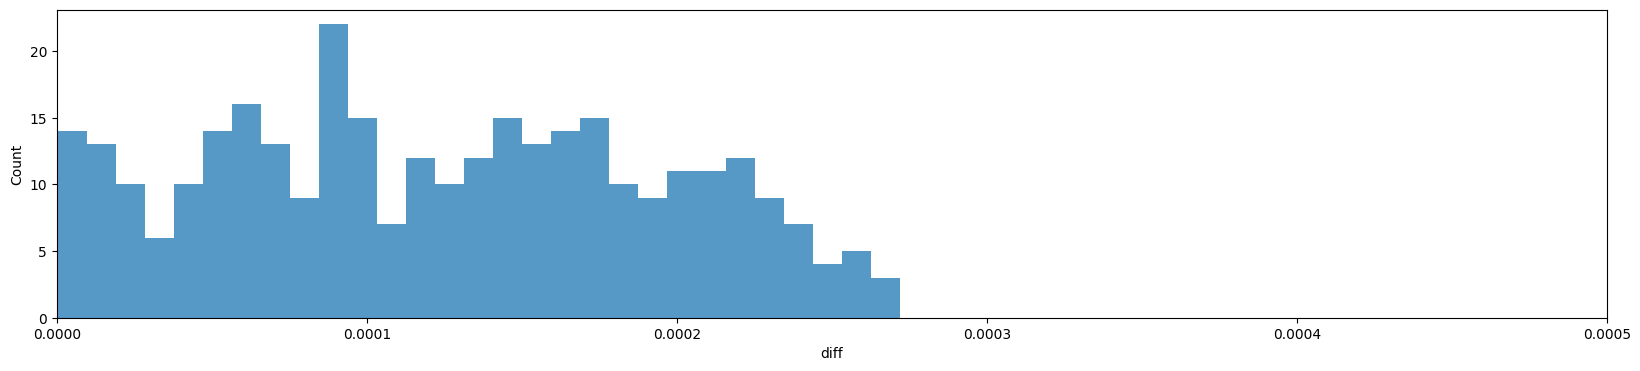

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=train1_scaled_pca, bins=100000)
plt.xlim([0,0.0005])
plt.show() # 0.0003 이상이면 이상치

In [ ]:
test1_scaled_pca['label'] = 0

<ipython-input-10-e5d4282c4859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1_scaled_pca['label'] = 0


In [ ]:
# 이상치 판단
train1_scaled_pca['label'] = np.where(train1_scaled_pca['diff'] > 0.0003, 1, 0)
train1_scaled_pca['label'].value_counts()

<ipython-input-80-676499c2351d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_scaled_pca['label'] = np.where(train1_scaled_pca['diff'] > 0.0003, 1, 0)


0    321
1     48
Name: label, dtype: int64

(-0.0125, -0.008)

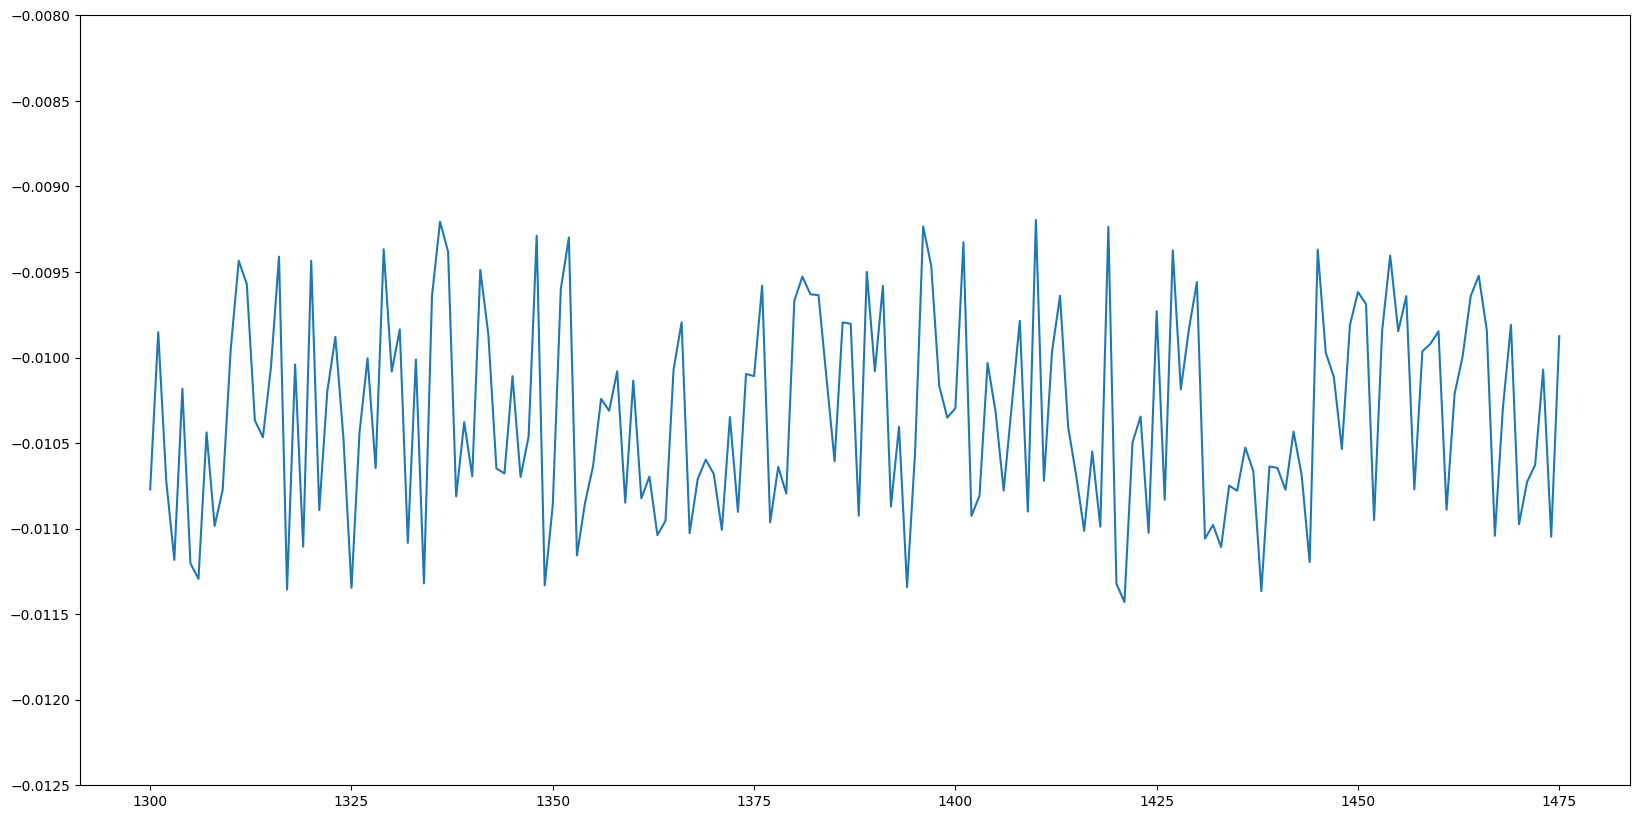

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(all1_scaled_pca[1][1300:])
plt.ylim([-0.0125,-0.008])

In [ ]:
len(all1_scaled_pca), len(train1_scaled_pca), len(test1_scaled_pca)

(1476, 369, 1107)

In [ ]:
len(train1_scaled_pca[(train1_scaled_pca[1]>-0.007) & (train1_scaled_pca[1]<-0.002)]), len(train1_scaled_pca[train1_scaled_pca[1]>0.8])

(32, 16)

In [ ]:
train1_scaled_pca.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            359, 360, 361, 362, 363, 364, 365, 366, 367, 368],
           dtype='int64', length=369)

In [ ]:
train1_scaled_pca[(train1_scaled_pca[1]>-0.007) & (train1_scaled_pca[1]<-0.003)].index, train1_scaled_pca[train1_scaled_pca[1]>0.8].index

(Int64Index([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
             130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
             143, 144, 145, 146, 147, 148],
            dtype='int64'),
 Int64Index([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
             162, 163, 164],
            dtype='int64'))

In [ ]:
len(train[train['motor_vibe']>10])

16

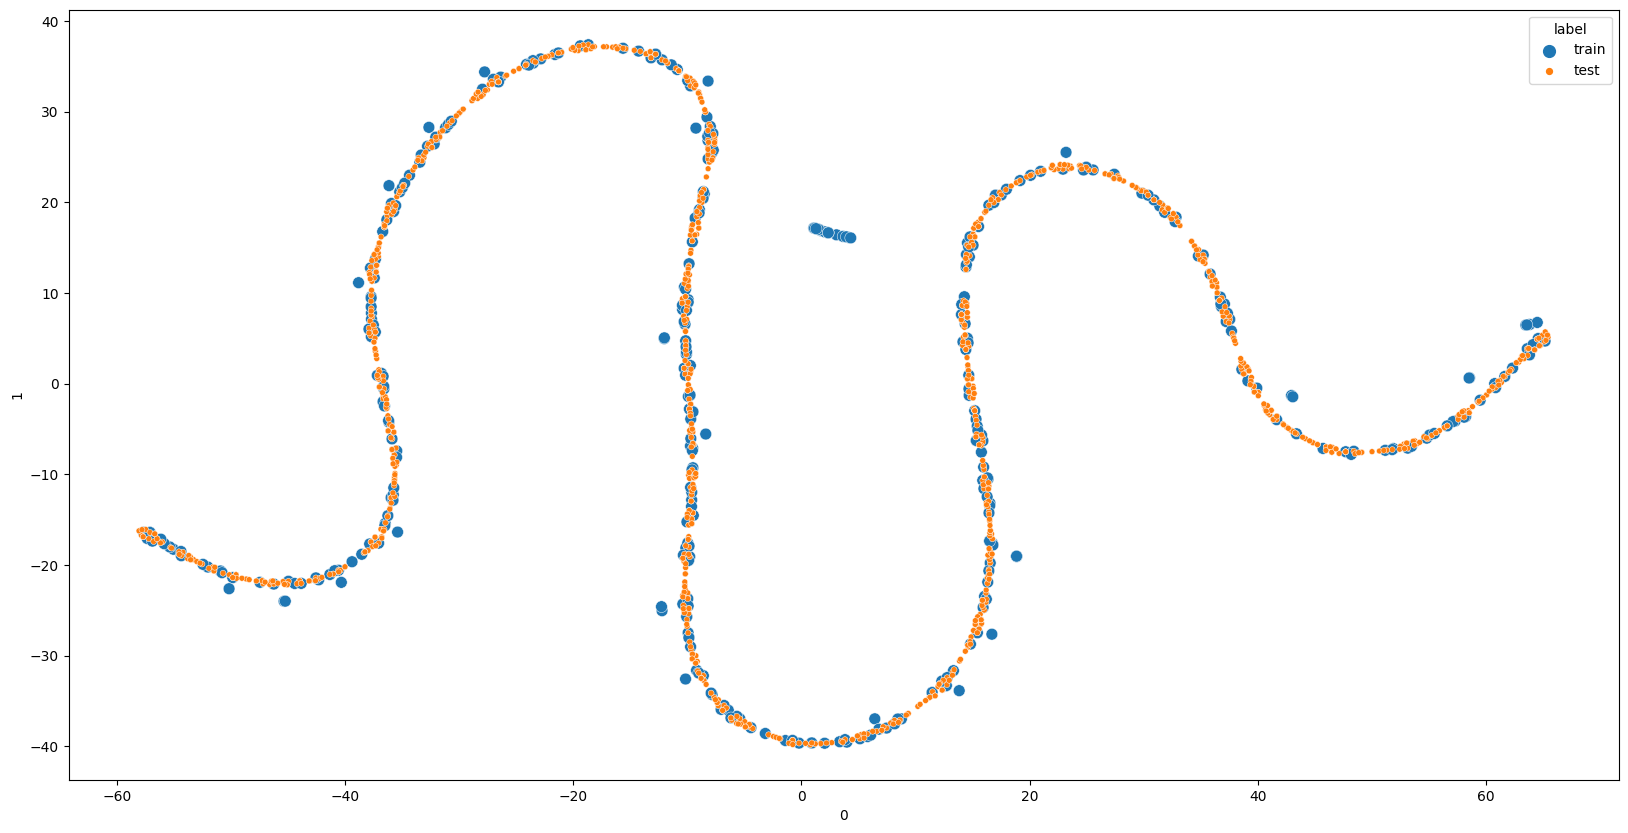

In [ ]:
all1_scaled_tsne = tsne.fit_transform(scaler.fit_transform(all1))
all1_scaled_tsne = pd.DataFrame(all1_scaled_tsne)
all1_scaled_tsne['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.figure(figsize=(20,10))
sns.scatterplot(x=all1_scaled_tsne[0], y=all1_scaled_tsne[1], data=all1_scaled_tsne, hue='label', size='label')
plt.show()

In [ ]:
test[test['type']==1]

air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
1296        1.95         59.83           0.7          28.81     3346.0   
1297        0.74         33.84           0.7          10.91     1267.0   
1298        0.97         38.78           0.7          14.31     1662.0   
1299        2.05         62.00           0.7          30.31     3520.0   
1300        1.60         52.29           0.7          23.62     2743.0   
...          ...           ...           ...            ...        ...   
2398        1.01         39.56           0.7          14.85     1725.0   
2399        1.05         40.44           0.7          15.46     1795.0   
2400        1.67         53.85           0.7          24.70     2868.0   
2401        0.84         35.99           0.7          12.39     1439.0   
2402        1.62         52.63           0.7          23.85     2770.0   

      motor_temp  motor_vibe  type  
1296       75.18        3.66     1  
1297       52.08        2.50     1  
1298       56.47        2.72     1  
1299       77.11        3.76     1  
1300       68.48        3.32     1  
...          ...         ...   ...  
2398       57.17        2.76     1  
2399       57.94        2.80     1  
2400       69.87        3.39     1  
2401       53.99        2.60     1  
2402       68.78        3.34     1  

[1107 rows x 8 columns]

In [ ]:
for i in range(22):
    plt.figure(figsize=(20,10))
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['air_inflow']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='air_inflow')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['air_end_temp']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='air_end_temp')
    #plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['out_pressure']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='out_pressure')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['motor_current']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_current')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['motor_rpm']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_rpm')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['motor_temp']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==1]['motor_vibe']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_vibe')
    plt.legend()
    plt.title(f'{50*(i)} ~ {50*(i+1)}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### type 2

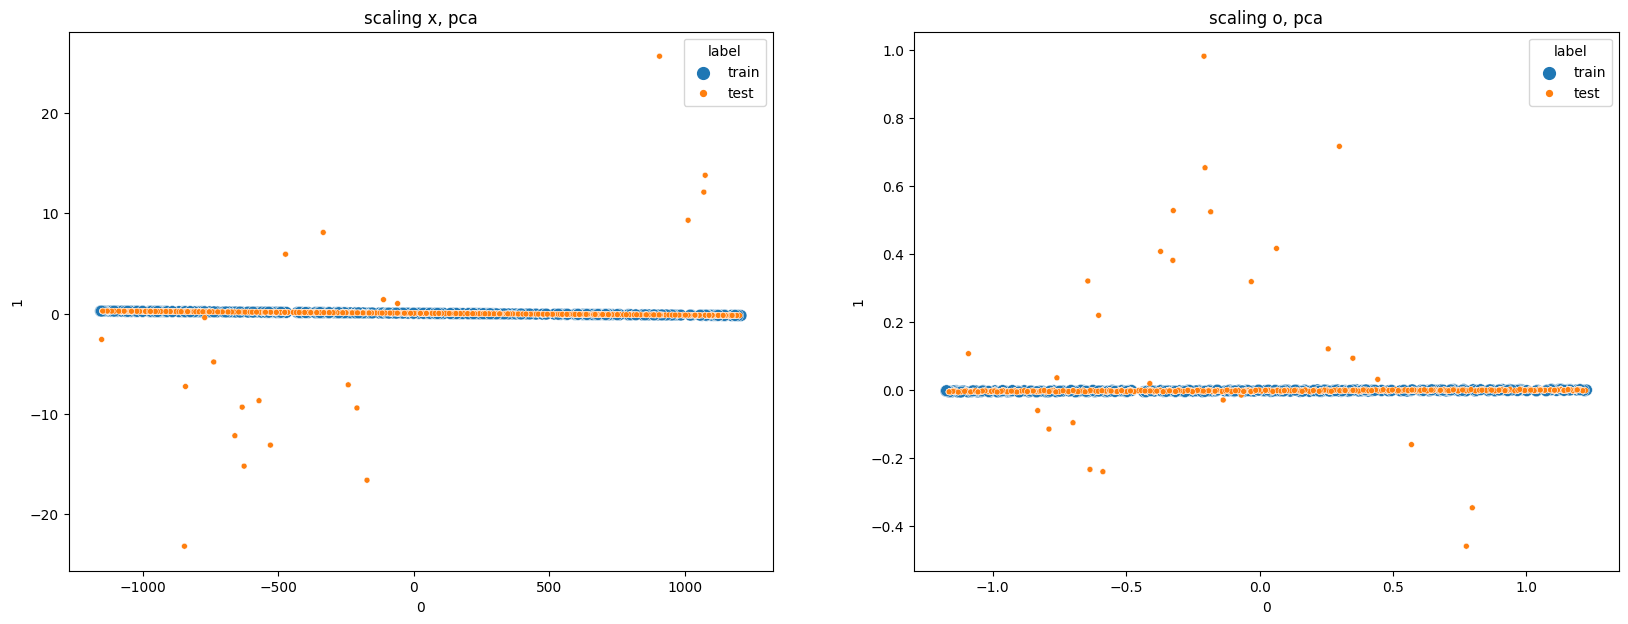

In [14]:
# all2 : pca(scaling x / scaling o)
all2_pca = pca.fit_transform(all2)
all2_pca = pd.DataFrame(all2_pca)
all2_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all2_pca[0], y=all2_pca[1], data=all2_pca, hue='label', size='label')
plt.title('scaling x, pca')

all2_scaled_pca = pca.fit_transform(scaler.fit_transform(all2))
all2_scaled_pca = pd.DataFrame(all2_scaled_pca)
all2_scaled_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.subplot(1,2,2)
sns.scatterplot(x=all2_scaled_pca[0], y=all2_scaled_pca[1], data=all2_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [15]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train2_scaled_pca = all2_scaled_pca[all2_scaled_pca['label']=='train']
test2_scaled_pca = all2_scaled_pca[all2_scaled_pca['label']=='test']

reg2 = LinearRegression()
reg2.fit(train2_scaled_pca[0].values.reshape(-1,1), train2_scaled_pca[1])

test2_scaled_pca['diff'] = abs(reg2.coef_ * test2_scaled_pca[0] + reg2.intercept_ - test2_scaled_pca[1])

<ipython-input-15-98316430b52d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_scaled_pca['diff'] = abs(reg2.coef_ * test2_scaled_pca[0] + reg2.intercept_ - test2_scaled_pca[1])


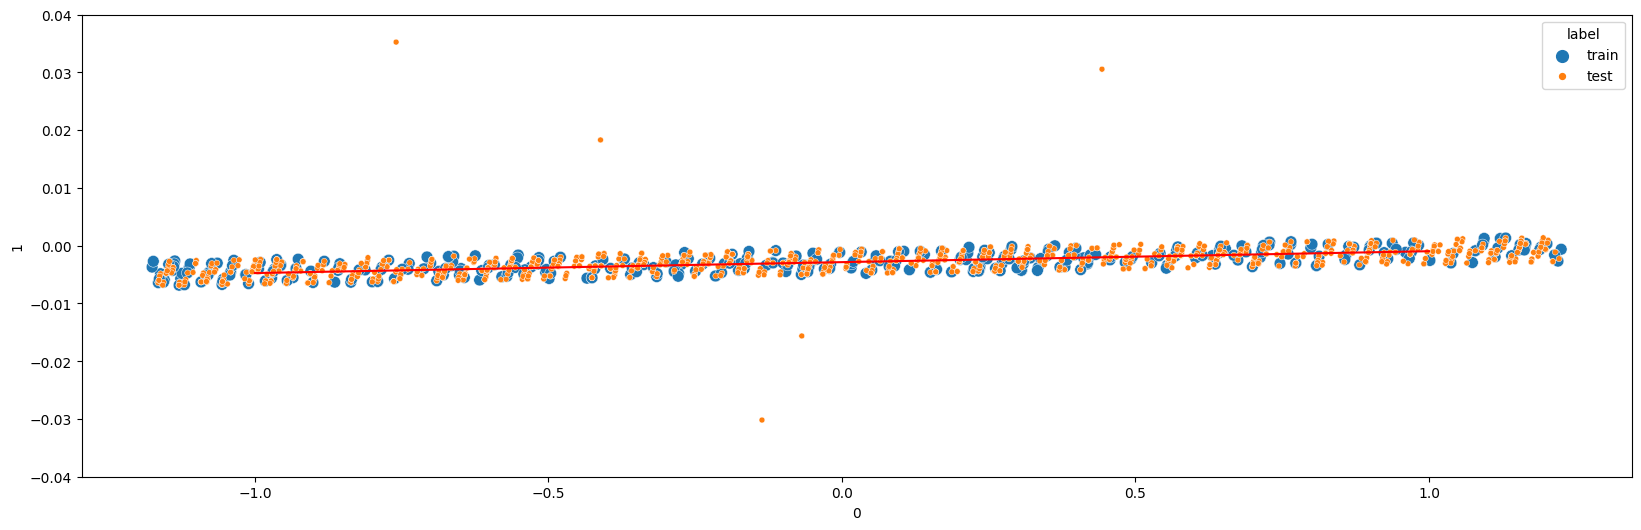

In [16]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all2_scaled_pca[0], y=all2_scaled_pca[1], data=all2_scaled_pca, hue='label', size='label')
plt.plot(X, reg2.coef_ * X + reg2.intercept_, color='red')
plt.ylim([-0.04,0.04])
plt.show()

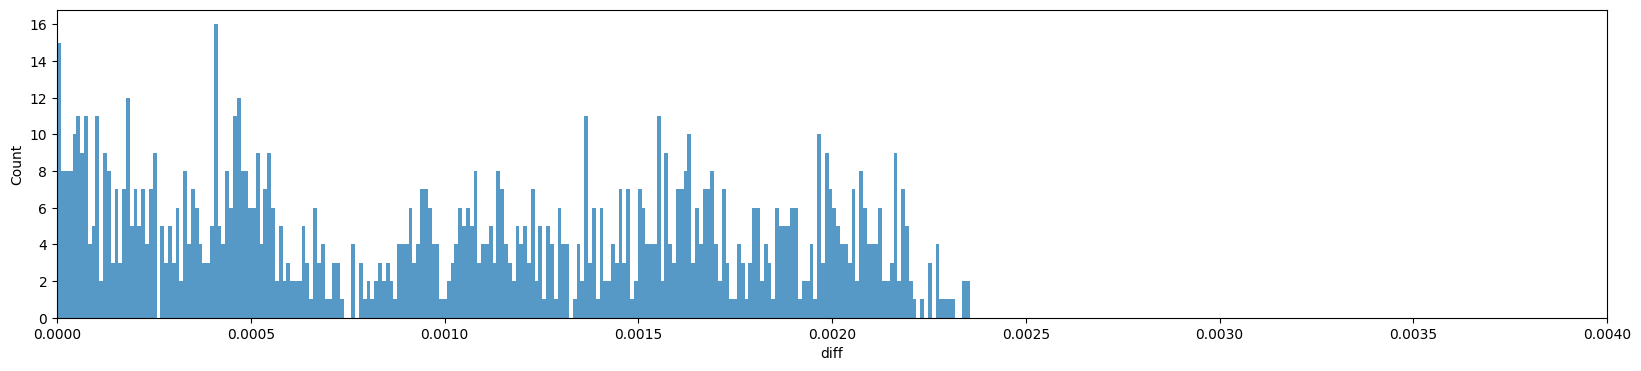

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test2_scaled_pca, bins=100000)
plt.xlim([0,0.004])
plt.show() # 0.003 이상이면 이상치

In [ ]:
test2_scaled_pca[test2_scaled_pca['diff']<0.0025].sort_values(by='diff', ascending=False).head()

0         1  label      diff
481  -1.099956 -0.002570      0  0.002353
780  -1.099956 -0.002570      0  0.002353
876  -1.026822 -0.002442      0  0.002343
678  -0.990256 -0.002378      0  0.002338
1317 -0.807422 -0.002058      0  0.002312

In [ ]:
# 이상치 판단
test2_scaled_pca['label'] = np.where(test2_scaled_pca['diff'] > 0.0025, 1, 0)
test2_scaled_pca['label'].value_counts()

<ipython-input-12-b9349914a456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2_scaled_pca['label'] = np.where(test2_scaled_pca['diff'] > 0.0025, 1, 0)


0    1071
1      27
Name: label, dtype: int64

In [ ]:
test2_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==2].drop('type', axis=1)))
test2_scaled_tsne = pd.DataFrame(test2_scaled_tsne)
test2_scaled_tsne.index = test2_scaled_pca.index
test2_scaled_tsne = pd.concat([test2_scaled_tsne, test2_scaled_pca['label']], axis=1)
test2_scaled_tsne['size'] = np.where(test2_scaled_tsne['label']==1, 10, 4)

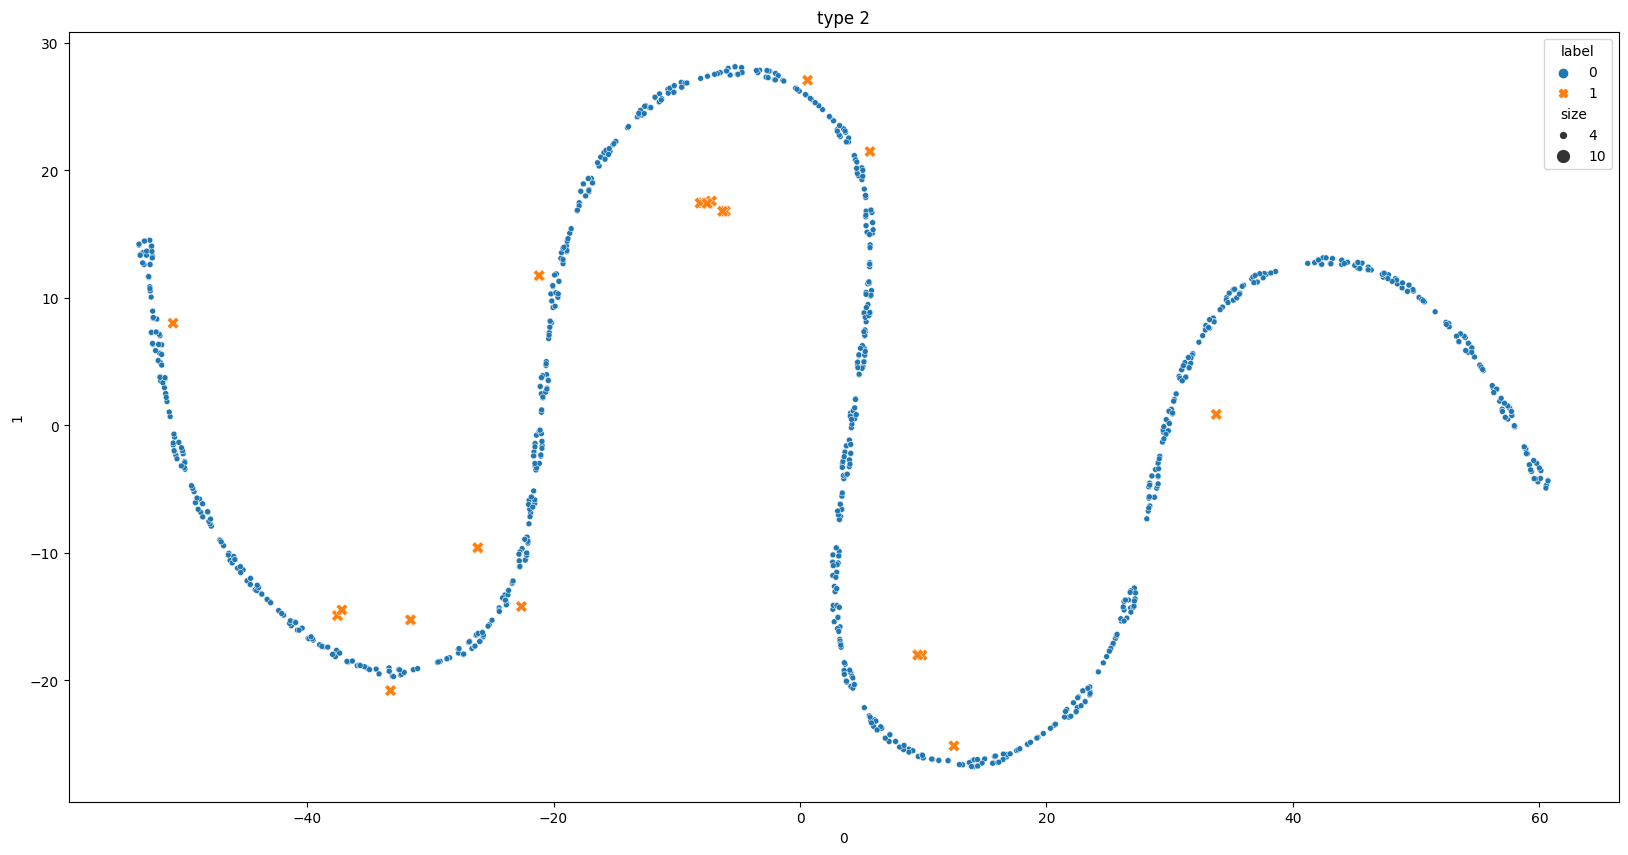

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test2_scaled_tsne[0], y=test2_scaled_tsne[1], data=test2_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 2')
#plt.xlim([-55,-45])
plt.show()

In [ ]:
test2_scaled_pca.reset_index(drop=True, inplace=True)
test2_scaled_pca[test2_scaled_pca['label']==1].index # type2 이상치 인덱스

Int64Index([239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
            252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
            265],
           dtype='int64')

In [ ]:
plt.figure(figsize=(20,220))
for i in range(22):
    plt.subplot(22,1,i+1)
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['air_inflow']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='air_inflow')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['air_end_temp']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='air_end_temp')
    #plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['out_pressure']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='out_pressure')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['motor_current']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_current')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['motor_rpm']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_rpm')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['motor_temp']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==2]['motor_vibe']).reshape(-1,1))[50*(i):50*(i+1)], marker='o', markersize=3, label='motor_vibe')
    plt.legend()
    plt.title(f'{50*(i)} ~ {50*(i+1)}')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### type 3

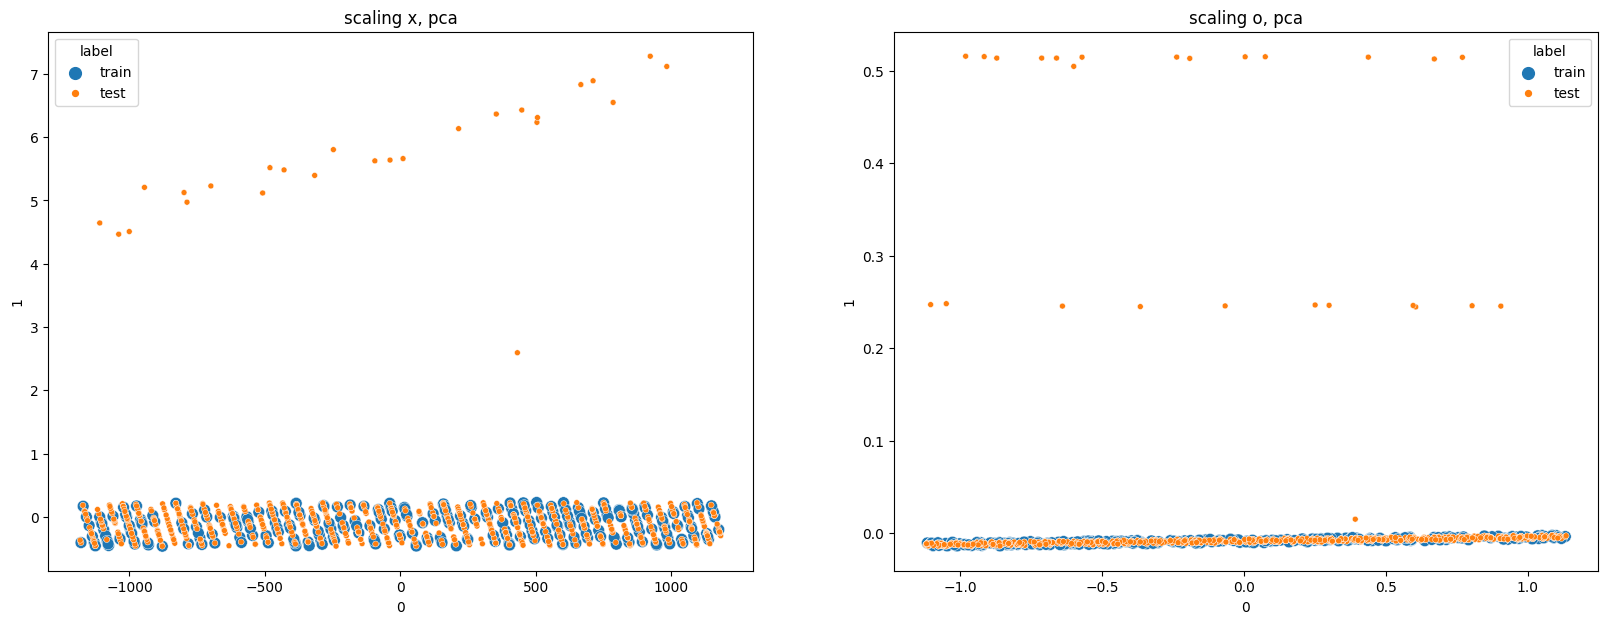

In [17]:
# all3 : pca(scaling x / scaling o)
all3_pca = pca.fit_transform(all3)
all3_pca = pd.DataFrame(all3_pca)
all3_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all3_pca[0], y=all3_pca[1], data=all3_pca, hue='label', size='label')
plt.title('scaling x, pca')

all3_scaled_pca = pca.fit_transform(scaler.fit_transform(all3))
all3_scaled_pca = pd.DataFrame(all3_scaled_pca)
all3_scaled_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.subplot(1,2,2)
sns.scatterplot(x=all3_scaled_pca[0], y=all3_scaled_pca[1], data=all3_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [18]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train3_scaled_pca = all3_scaled_pca[all3_scaled_pca['label']=='train']
test3_scaled_pca = all3_scaled_pca[all3_scaled_pca['label']=='test']

reg3 = LinearRegression()
reg3.fit(train3_scaled_pca[0].values.reshape(-1,1), train3_scaled_pca[1])

test3_scaled_pca['diff'] = abs(reg3.coef_ * test3_scaled_pca[0] + reg3.intercept_ - test3_scaled_pca[1])

<ipython-input-18-20f8ff061352>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_scaled_pca['diff'] = abs(reg3.coef_ * test3_scaled_pca[0] + reg3.intercept_ - test3_scaled_pca[1])


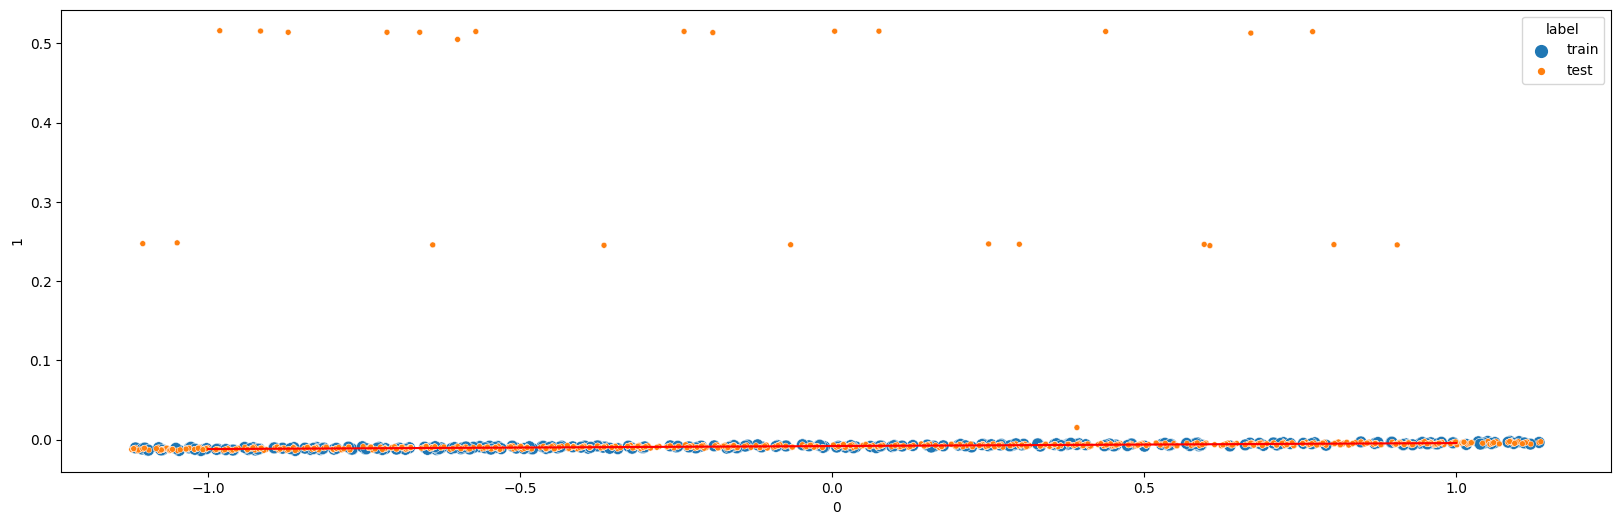

In [19]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all3_scaled_pca[0], y=all3_scaled_pca[1], data=all3_scaled_pca, hue='label', size='label')
plt.plot(X, reg3.coef_ * X + reg3.intercept_, color='red')
#plt.ylim([-0.02,0])
plt.show()

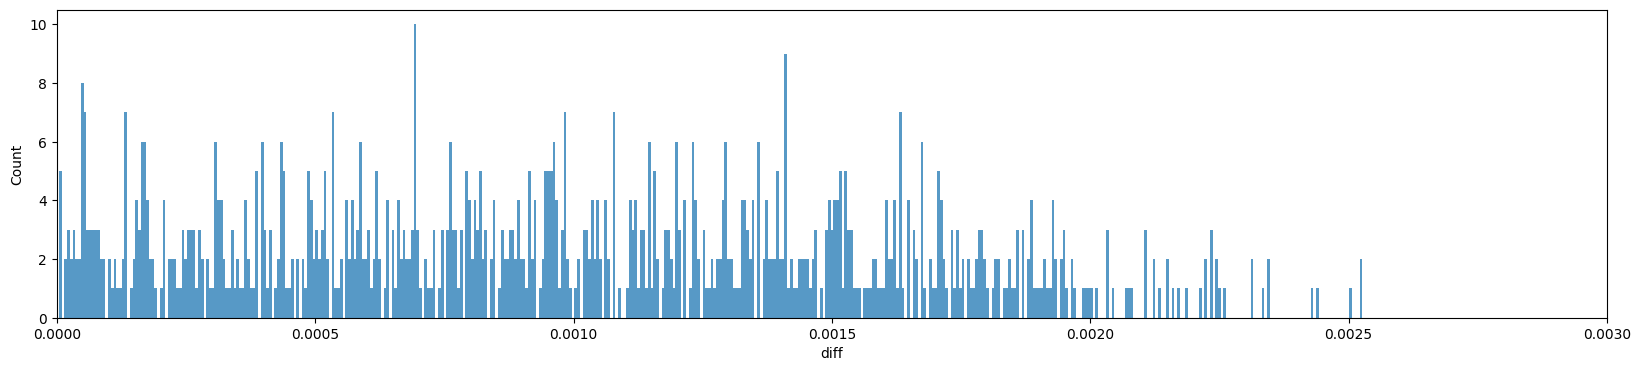

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test3_scaled_pca, bins=100000)
plt.xlim([0,0.003])
plt.show() # 0.003 이상이면 이상치

In [ ]:
# 이상치 판단
test3_scaled_pca['label'] = np.where(test3_scaled_pca['diff'] > 0.003, 1, 0)
test3_scaled_pca['label'].value_counts()

<ipython-input-23-a10610313a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3_scaled_pca['label'] = np.where(test3_scaled_pca['diff'] > 0.003, 1, 0)


0    892
1     26
Name: label, dtype: int64

In [ ]:
test3_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==3].drop('type', axis=1)))
test3_scaled_tsne = pd.DataFrame(test3_scaled_tsne)
test3_scaled_tsne.index = test3_scaled_pca.index
test3_scaled_tsne = pd.concat([test3_scaled_tsne, test3_scaled_pca['label']], axis=1)
test3_scaled_tsne['size'] = np.where(test3_scaled_tsne['label']==1, 10, 4)

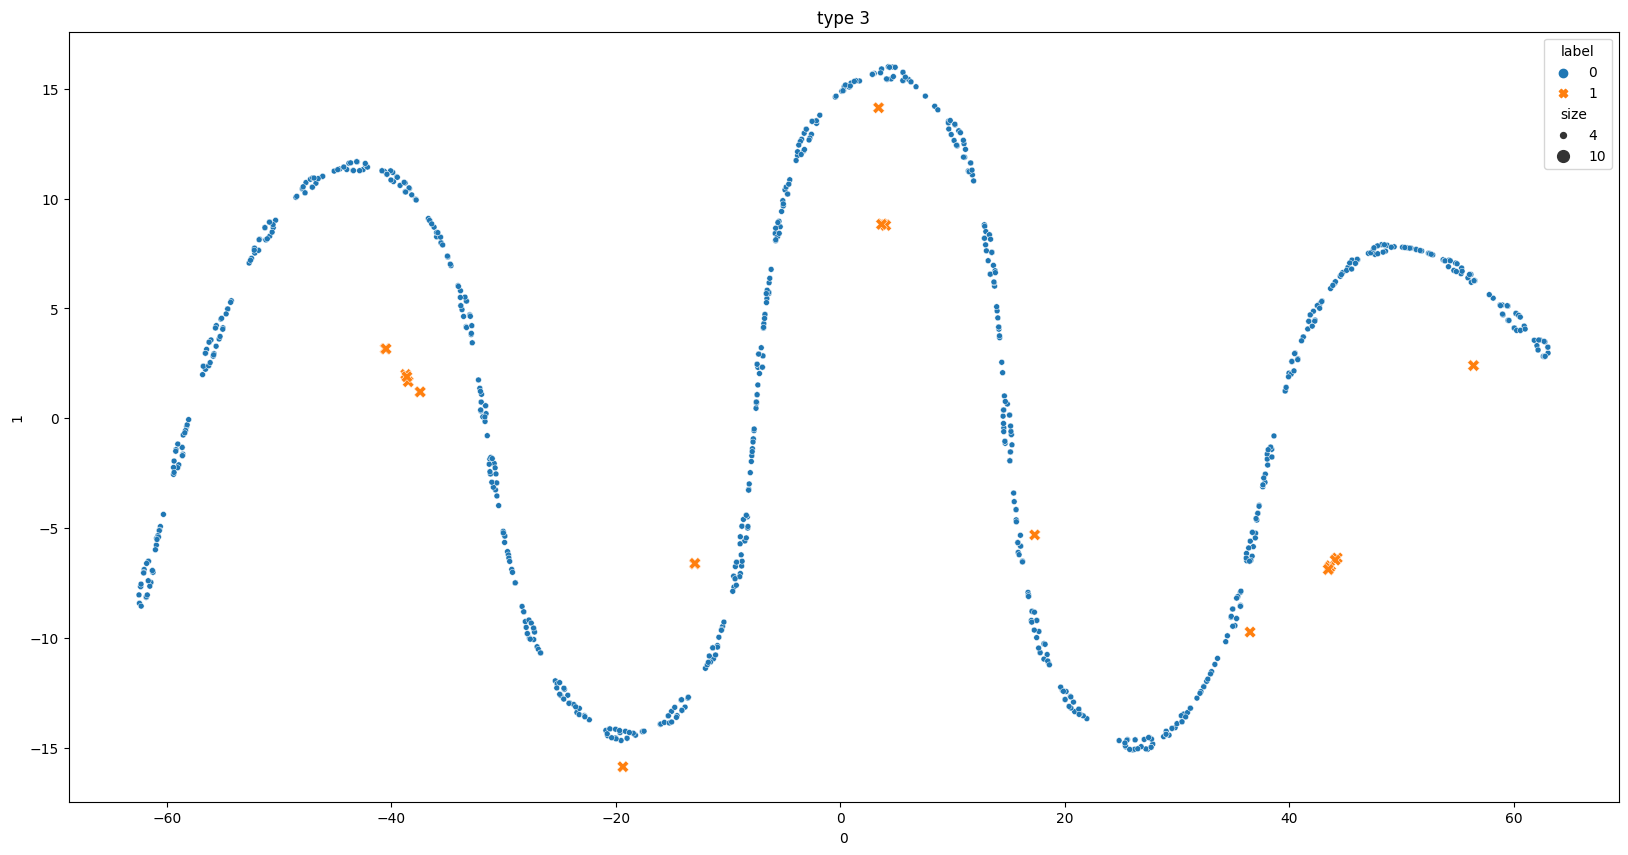

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test3_scaled_tsne[0], y=test3_scaled_tsne[1], data=test3_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 3')
plt.show()

In [ ]:
test3_scaled_pca.reset_index(drop=True, inplace=True)
test3_scaled_pca[test3_scaled_pca['label']==1].index # type3 이상치 인덱스

Int64Index([439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
            452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464],
           dtype='int64')

In [ ]:
plt.figure(figsize=(20,230))
for i in range(23):
    plt.subplot(23,1,i+1)
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['air_inflow']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_inflow')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['air_end_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_end_temp')
    #plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['out_pressure']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='out_pressure')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['motor_current']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_current')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['motor_rpm']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_rpm')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['motor_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==3]['motor_vibe']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_vibe')
    plt.legend()
    plt.title(f'{40*(i)} ~ {40*(i+1)}')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### type 4

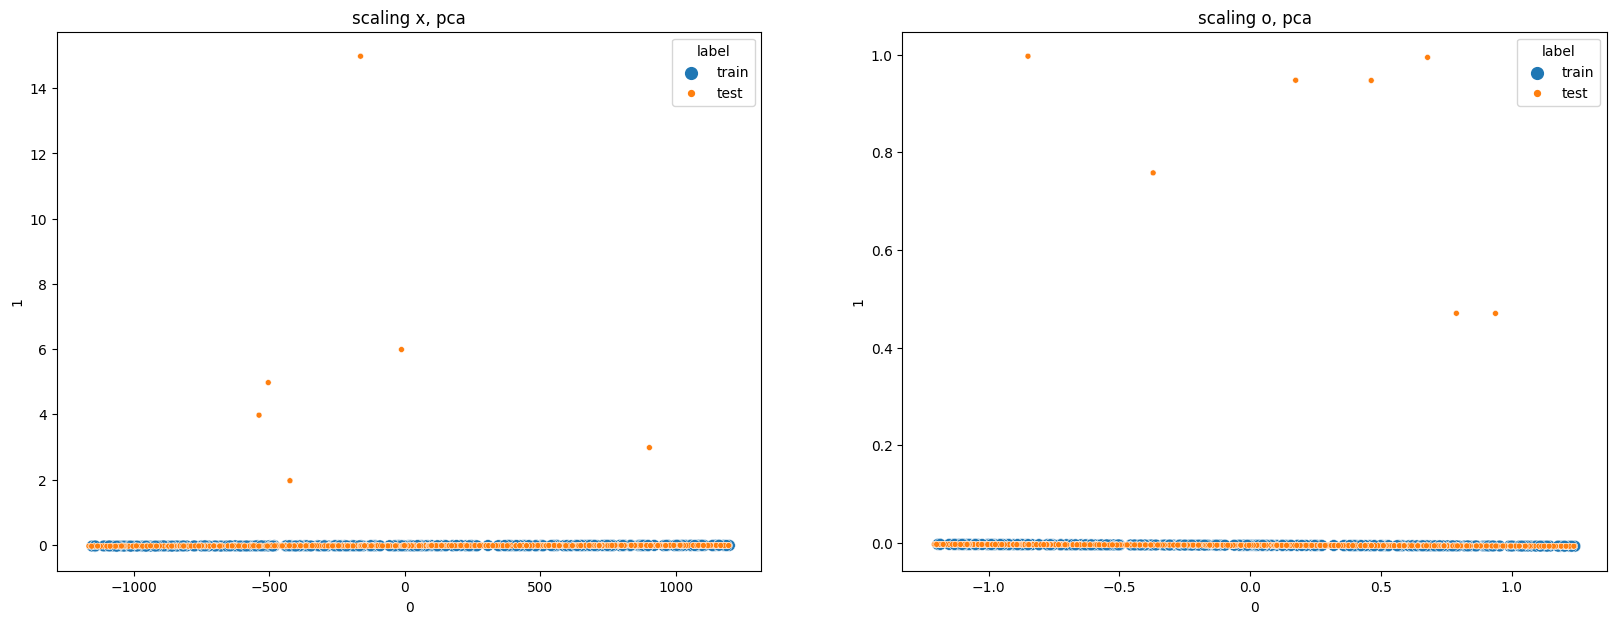

In [20]:
# all4 : pca(scaling x / scaling o)
all4_pca = pca.fit_transform(all4)
all4_pca = pd.DataFrame(all4_pca)
all4_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all4_pca[0], y=all4_pca[1], data=all4_pca, hue='label', size='label')
plt.title('scaling x, pca')

all4_scaled_pca = pca.fit_transform(scaler.fit_transform(all4))
all4_scaled_pca = pd.DataFrame(all4_scaled_pca)
all4_scaled_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.subplot(1,2,2)
sns.scatterplot(x=all4_scaled_pca[0], y=all4_scaled_pca[1], data=all4_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [21]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train4_scaled_pca = all4_scaled_pca[all4_scaled_pca['label']=='train']
test4_scaled_pca = all4_scaled_pca[all4_scaled_pca['label']=='test']

reg4 = LinearRegression()
reg4.fit(train4_scaled_pca[0].values.reshape(-1,1), train4_scaled_pca[1])

test4_scaled_pca['diff'] = abs(reg4.coef_ * test4_scaled_pca[0] + reg4.intercept_ - test4_scaled_pca[1])

<ipython-input-21-510d267bf3db>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_scaled_pca['diff'] = abs(reg4.coef_ * test4_scaled_pca[0] + reg4.intercept_ - test4_scaled_pca[1])


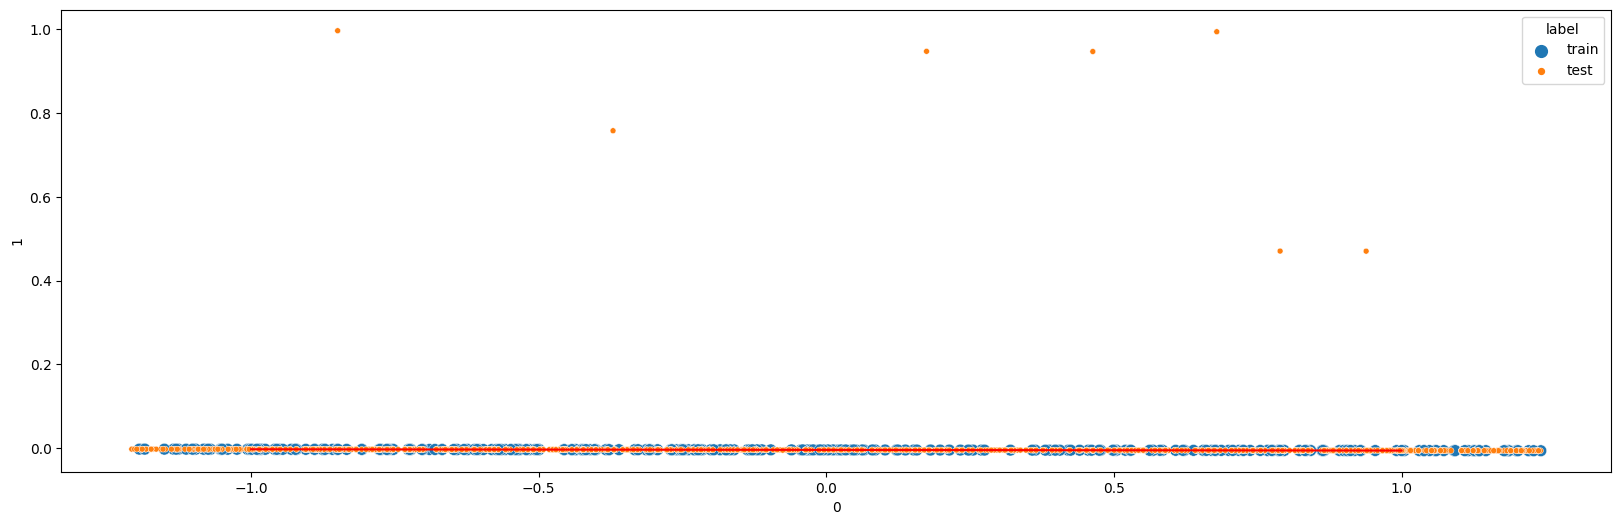

In [22]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all4_scaled_pca[0], y=all4_scaled_pca[1], data=all4_scaled_pca, hue='label', size='label')
plt.plot(X, reg4.coef_ * X + reg4.intercept_, color='red')
#plt.ylim([-0.004,-0.003])
#plt.ylim([-0.0055,-0.0045])
#plt.ylim([-0.0065,-0.006])
#plt.ylim([-0.007,-0.0025])
plt.show()

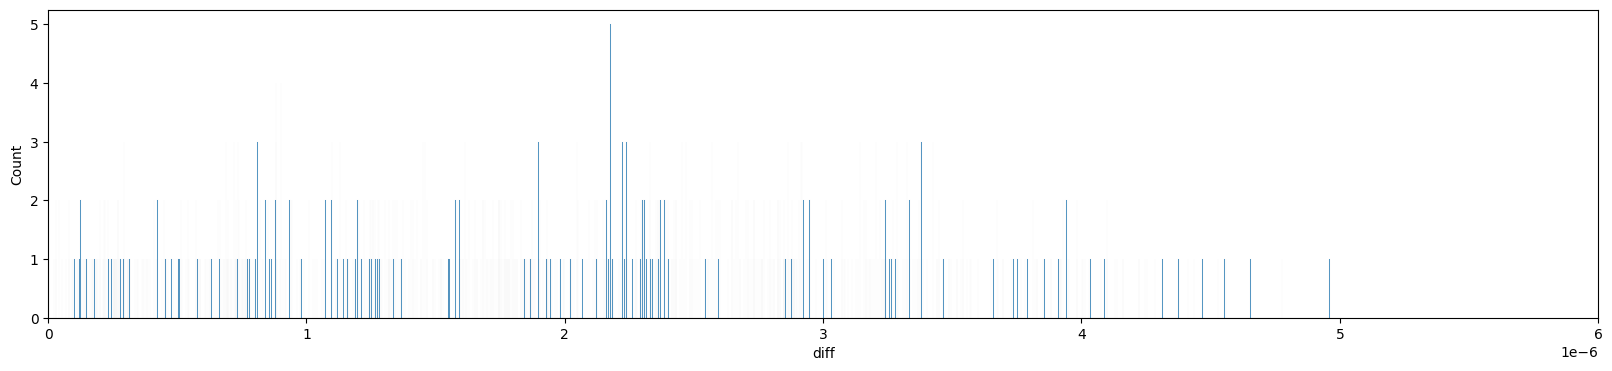

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test4_scaled_pca[test4_scaled_pca['diff']<0.000006], bins=10000)
plt.xlim([0,0.000006])
plt.show() # 0.000006 이상이면 이상치

In [ ]:
test4_scaled_pca

0         1  label          diff
306  -0.036960 -0.004529      0  2.880193e-06
307  -0.234886 -0.004224      0  1.226107e-06
308  -0.733408 -0.003448      0  2.847394e-06
309   0.230822 -0.004947      0  2.360950e-06
310  -0.365889 -0.004019      0  1.280311e-06
...        ...       ...    ...           ...
1219  0.321251 -0.005087      0  2.894448e-06
1220  0.337221 -0.005113      0  2.423323e-06
1221 -0.085471 -0.004455      0  7.647772e-07
1222 -0.526713 -0.003770      0  2.391383e-06
1223  0.139295 -0.004808      0  1.682977e-06

[918 rows x 4 columns]

In [ ]:
len(test0_scaled_pca) + len(test1_scaled_pca) + len(test2_scaled_pca) + len(test3_scaled_pca)

4419

In [ ]:
test4_scaled_pca[(test4_scaled_pca['diff']>0.0000048) & (test4_scaled_pca['diff']<0.000005)]

0         1  label      diff
634 -1.124782 -0.002839      1  0.000005

In [ ]:
# 이상치 판단
test4_scaled_pca['label'] = np.where(test4_scaled_pca['diff'] > 0.000005, 1, 0)
test4_scaled_pca['label'].value_counts()

<ipython-input-92-98423817d4fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4_scaled_pca['label'] = np.where(test4_scaled_pca['diff'] > 0.000005, 1, 0)


0    905
1     13
Name: label, dtype: int64

In [ ]:
test4_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==4].drop('type', axis=1)))
test4_scaled_tsne = pd.DataFrame(test4_scaled_tsne)
test4_scaled_tsne.index = test4_scaled_pca.index
test4_scaled_tsne = pd.concat([test4_scaled_tsne, test4_scaled_pca['label']], axis=1)
test4_scaled_tsne['size'] = np.where(test4_scaled_tsne['label']==1, 10, 4)

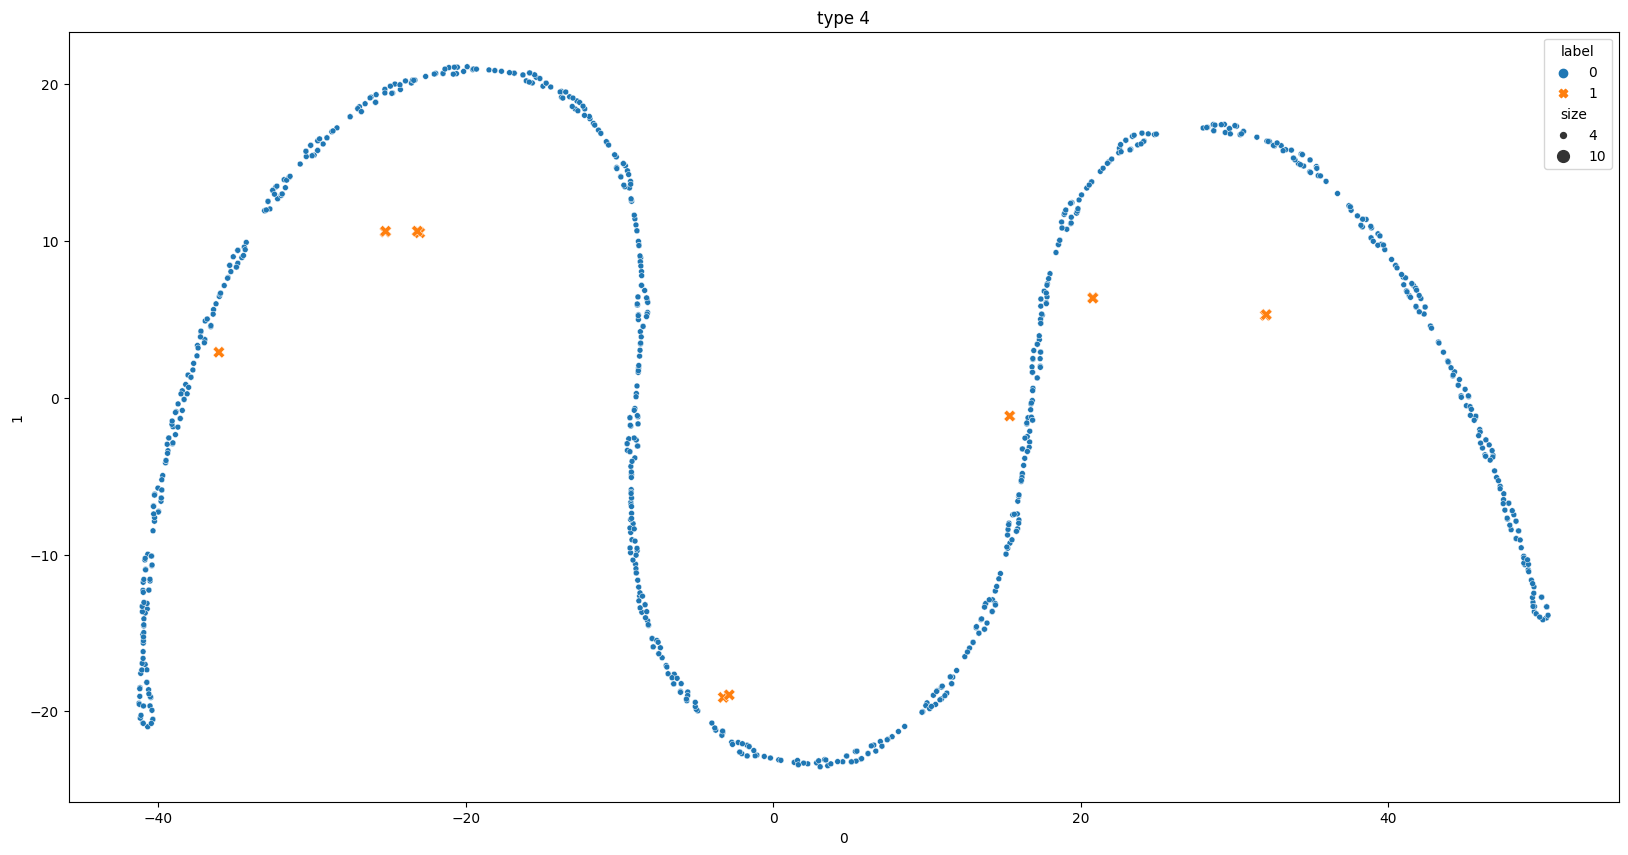

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test4_scaled_tsne[0], y=test4_scaled_tsne[1], data=test4_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 4')
plt.show()

##### type 5

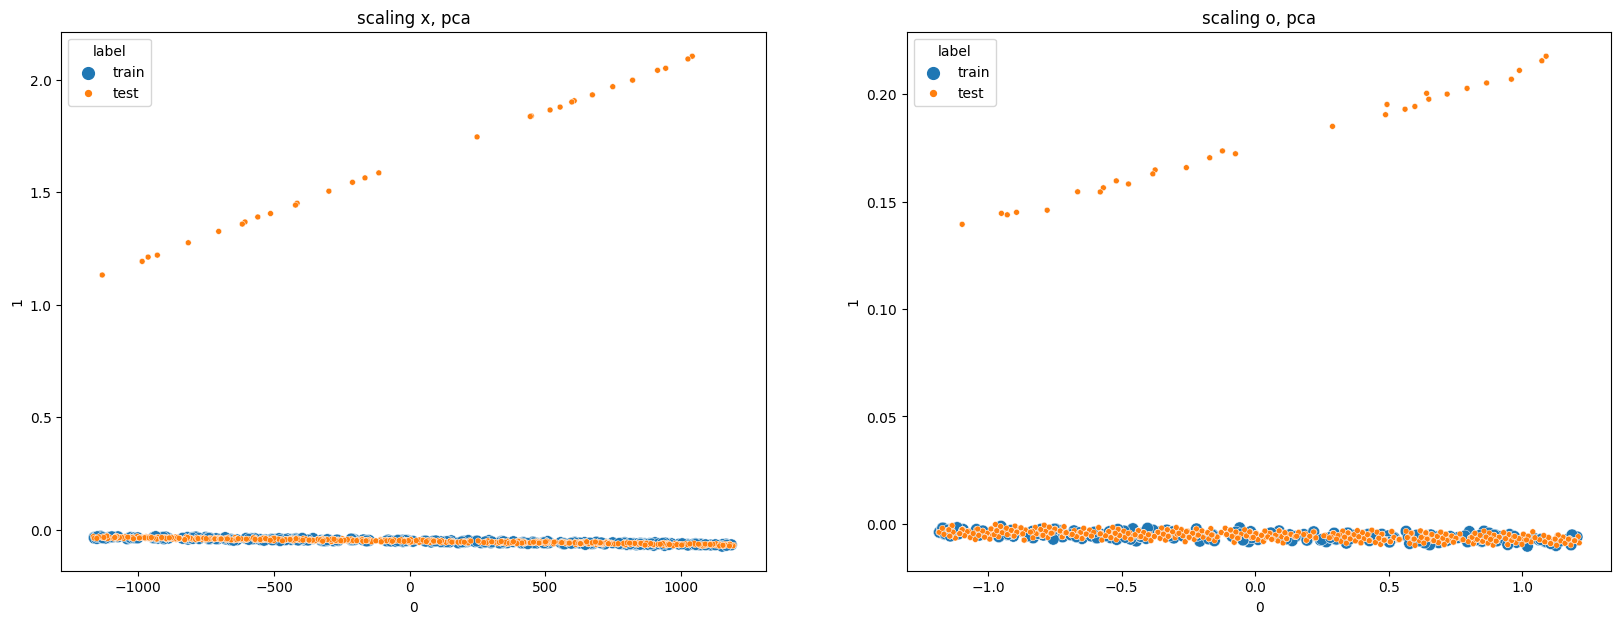

In [23]:
# all5 : pca(scaling x / scaling o)
all5_pca = pca.fit_transform(all5)
all5_pca = pd.DataFrame(all5_pca)
all5_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all5_pca[0], y=all5_pca[1], data=all5_pca, hue='label', size='label')
plt.title('scaling x, pca')

all5_scaled_pca = pca.fit_transform(scaler.fit_transform(all5))
all5_scaled_pca = pd.DataFrame(all5_scaled_pca)
all5_scaled_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.subplot(1,2,2)
sns.scatterplot(x=all5_scaled_pca[0], y=all5_scaled_pca[1], data=all5_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [24]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train5_scaled_pca = all5_scaled_pca[all5_scaled_pca['label']=='train']
test5_scaled_pca = all5_scaled_pca[all5_scaled_pca['label']=='test']

reg5 = LinearRegression()
reg5.fit(train5_scaled_pca[0].values.reshape(-1,1), train5_scaled_pca[1])

test5_scaled_pca['diff'] = abs(reg5.coef_ * test5_scaled_pca[0] + reg5.intercept_ - test5_scaled_pca[1])

<ipython-input-24-1baec5ddb7fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test5_scaled_pca['diff'] = abs(reg5.coef_ * test5_scaled_pca[0] + reg5.intercept_ - test5_scaled_pca[1])


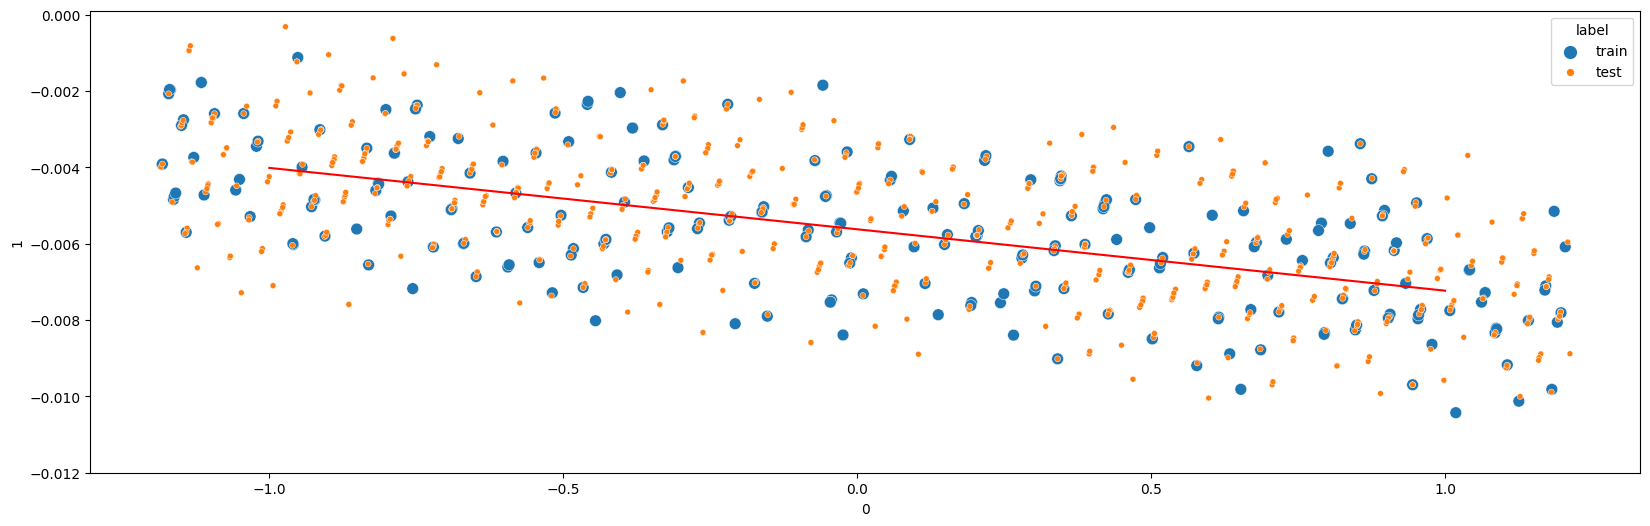

In [25]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all5_scaled_pca[0], y=all5_scaled_pca[1], data=all5_scaled_pca, hue='label', size='label')
plt.plot(X, reg5.coef_ * X + reg5.intercept_, color='red')
plt.ylim([-0.012,0.0001])
plt.show()

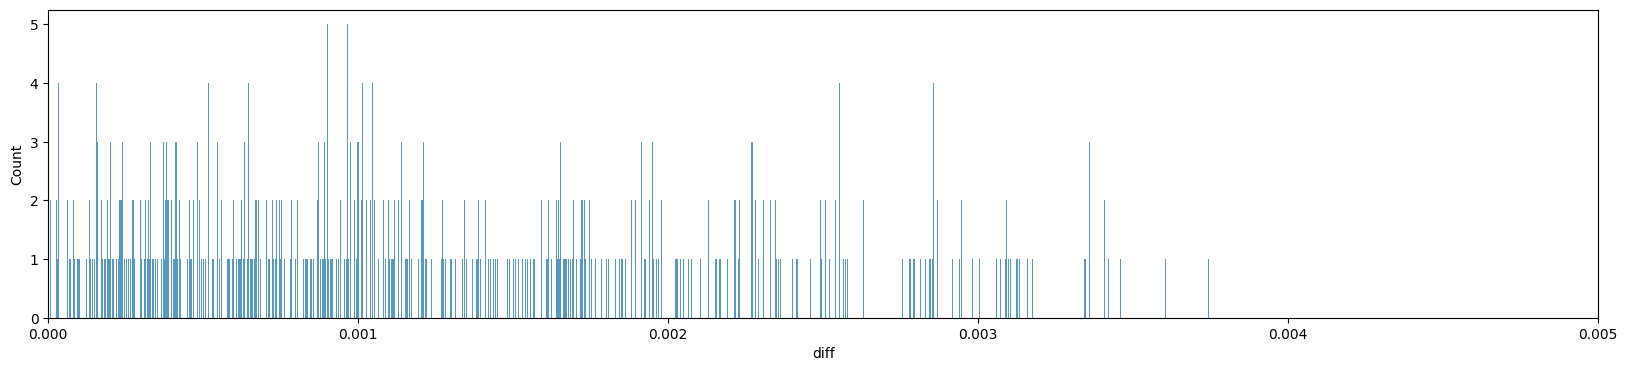

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test5_scaled_pca, bins=100000)
plt.xlim([0,0.005])
plt.show() # 0.004 이상이면 이상치

In [ ]:
# 이상치 판단
test5_scaled_pca['label'] = np.where(test5_scaled_pca['diff'] > 0.004, 1, 0)
test5_scaled_pca['label'].value_counts()

<ipython-input-99-74db6193620b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test5_scaled_pca['label'] = np.where(test5_scaled_pca['diff'] > 0.004, 1, 0)


0    717
1     30
Name: label, dtype: int64

In [ ]:
test5_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==5].drop('type', axis=1)))
test5_scaled_tsne = pd.DataFrame(test5_scaled_tsne)
test5_scaled_tsne.index = test5_scaled_pca.index
test5_scaled_tsne = pd.concat([test5_scaled_tsne, test5_scaled_pca['label']], axis=1)
test5_scaled_tsne['size'] = np.where(test5_scaled_tsne['label']==1, 10, 4)

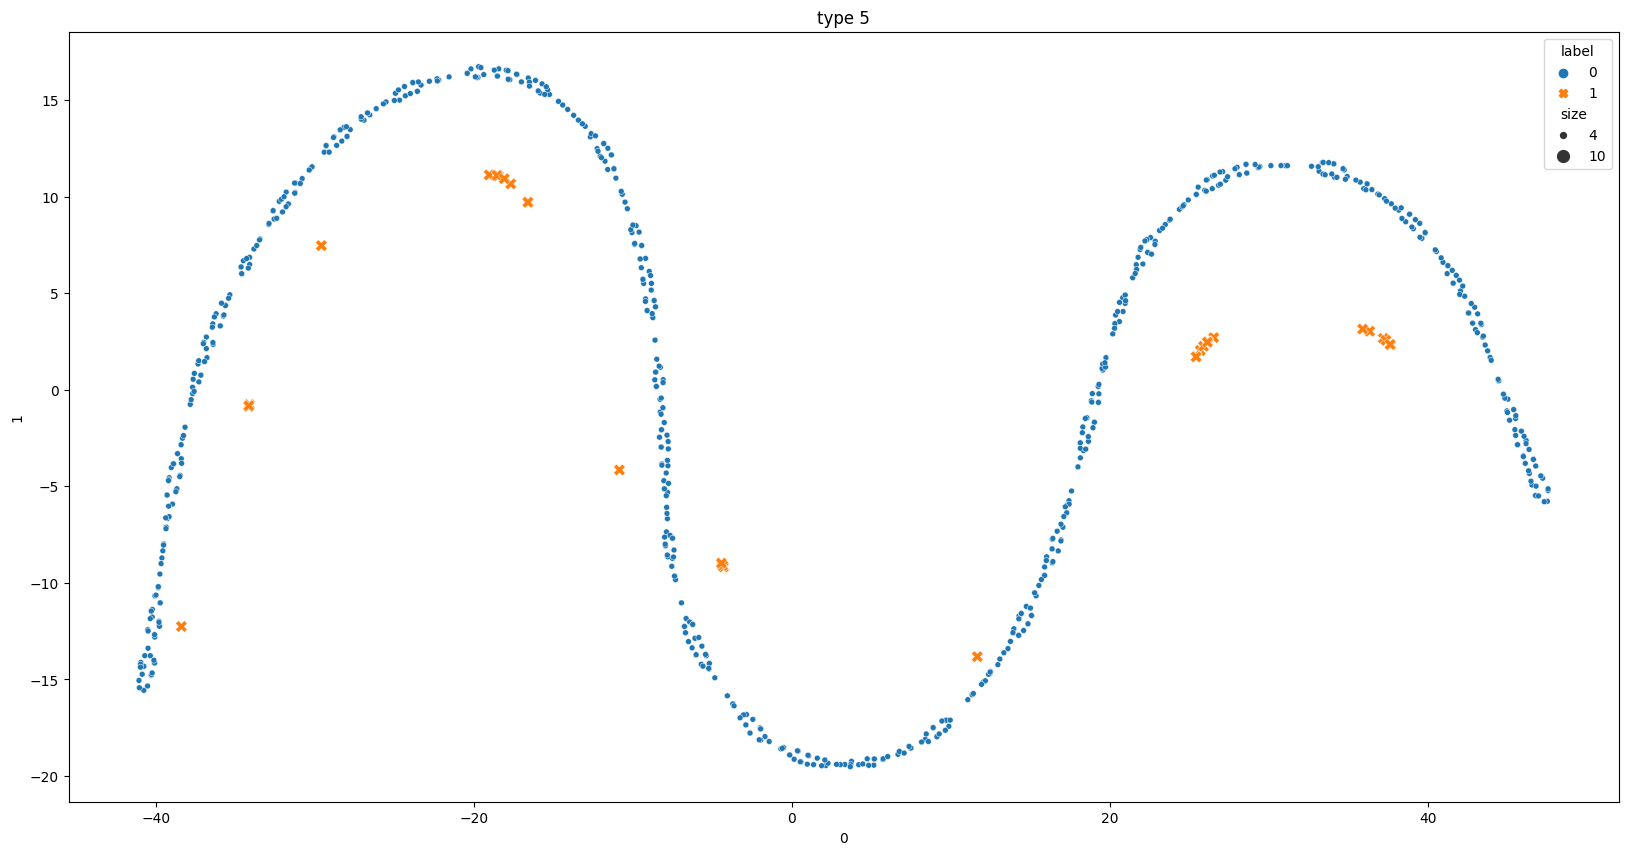

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test5_scaled_tsne[0], y=test5_scaled_tsne[1], data=test5_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 5')
plt.show()

##### type 6

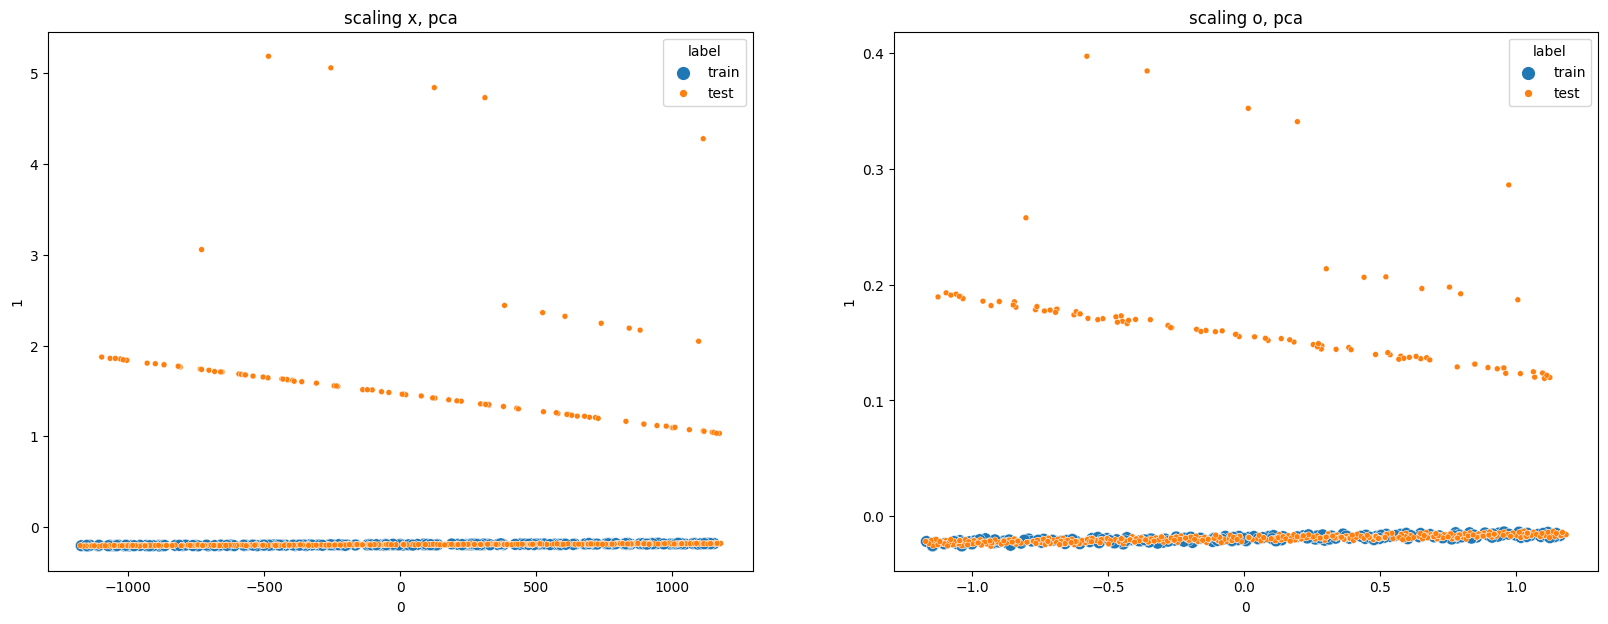

In [26]:
# all6 : pca(scaling x / scaling o)
all6_pca = pca.fit_transform(all6)
all6_pca = pd.DataFrame(all6_pca)
all6_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all6_pca[0], y=all6_pca[1], data=all6_pca, hue='label', size='label')
plt.title('scaling x, pca')

all6_scaled_pca = pca.fit_transform(scaler.fit_transform(all6))
all6_scaled_pca = pd.DataFrame(all6_scaled_pca)
all6_scaled_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.subplot(1,2,2)
sns.scatterplot(x=all6_scaled_pca[0], y=all6_scaled_pca[1], data=all6_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [27]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train6_scaled_pca = all6_scaled_pca[all6_scaled_pca['label']=='train']
test6_scaled_pca = all6_scaled_pca[all6_scaled_pca['label']=='test']

reg6 = LinearRegression()
reg6.fit(train6_scaled_pca[0].values.reshape(-1,1), train6_scaled_pca[1])

test6_scaled_pca['diff'] = abs(reg6.coef_ * test6_scaled_pca[0] + reg6.intercept_ - test6_scaled_pca[1])

<ipython-input-27-b431a9748b49>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test6_scaled_pca['diff'] = abs(reg6.coef_ * test6_scaled_pca[0] + reg6.intercept_ - test6_scaled_pca[1])


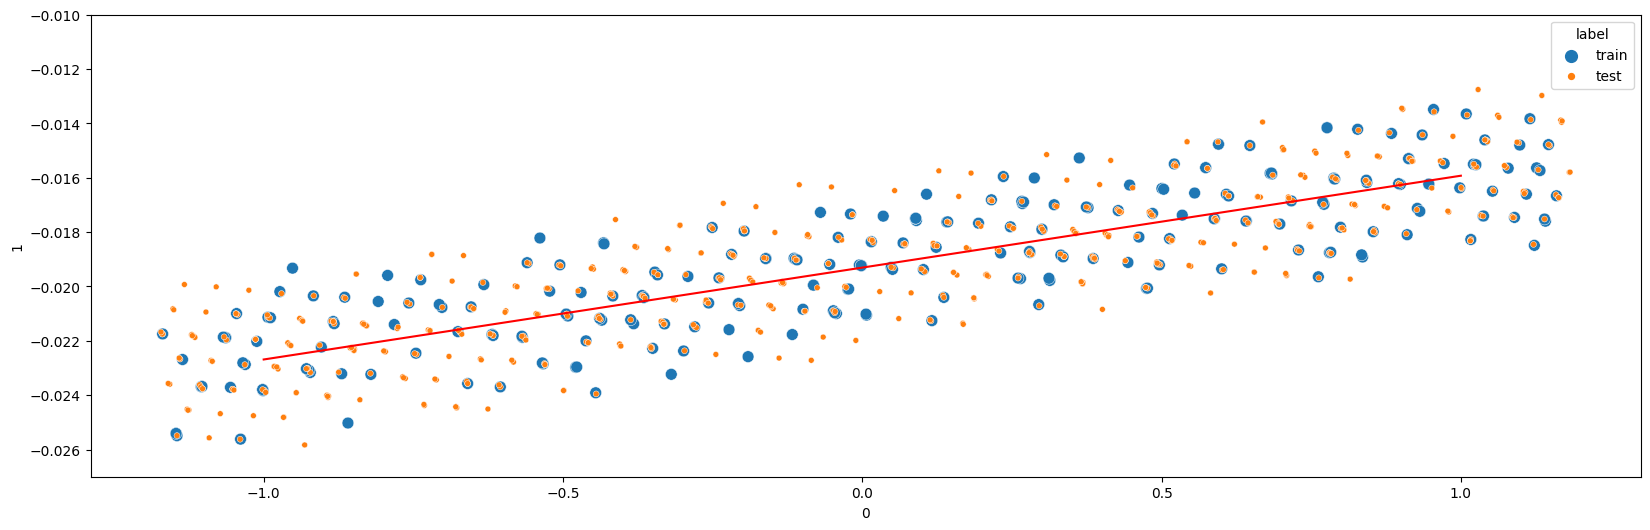

In [28]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all6_scaled_pca[0], y=all6_scaled_pca[1], data=all6_scaled_pca, hue='label', size='label')
plt.plot(X, reg6.coef_ * X + reg6.intercept_, color='red')
plt.ylim([-0.027,-0.01])
plt.show()

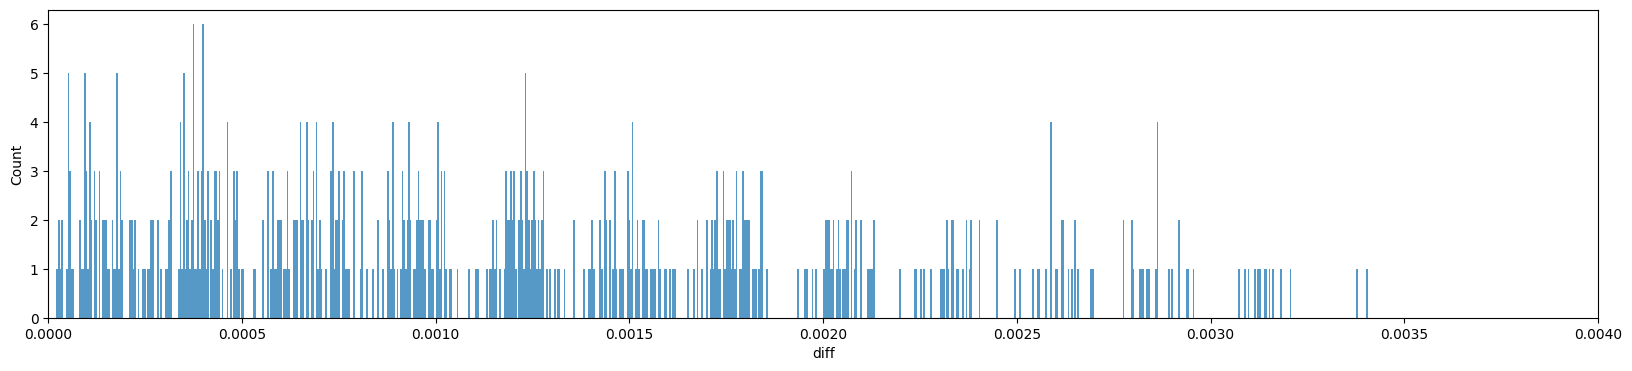

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test6_scaled_pca, bins=100000)
plt.xlim([0,0.004])
plt.show() # 0.0035 이상이면 이상치

In [ ]:
# 이상치 판단
test6_scaled_pca['label'] = np.where(test6_scaled_pca['diff'] > 0.0035, 1, 0)
test6_scaled_pca['label'].value_counts()

<ipython-input-117-39e075690af1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test6_scaled_pca['label'] = np.where(test6_scaled_pca['diff'] > 0.0035, 1, 0)


0    646
1    101
Name: label, dtype: int64

In [ ]:
test6_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==6].drop('type', axis=1)))
test6_scaled_tsne = pd.DataFrame(test6_scaled_tsne)
test6_scaled_tsne.index = test6_scaled_pca.index
test6_scaled_tsne = pd.concat([test6_scaled_tsne, test6_scaled_pca['label']], axis=1)
test6_scaled_tsne['size'] = np.where(test6_scaled_tsne['label']==1, 10, 4)

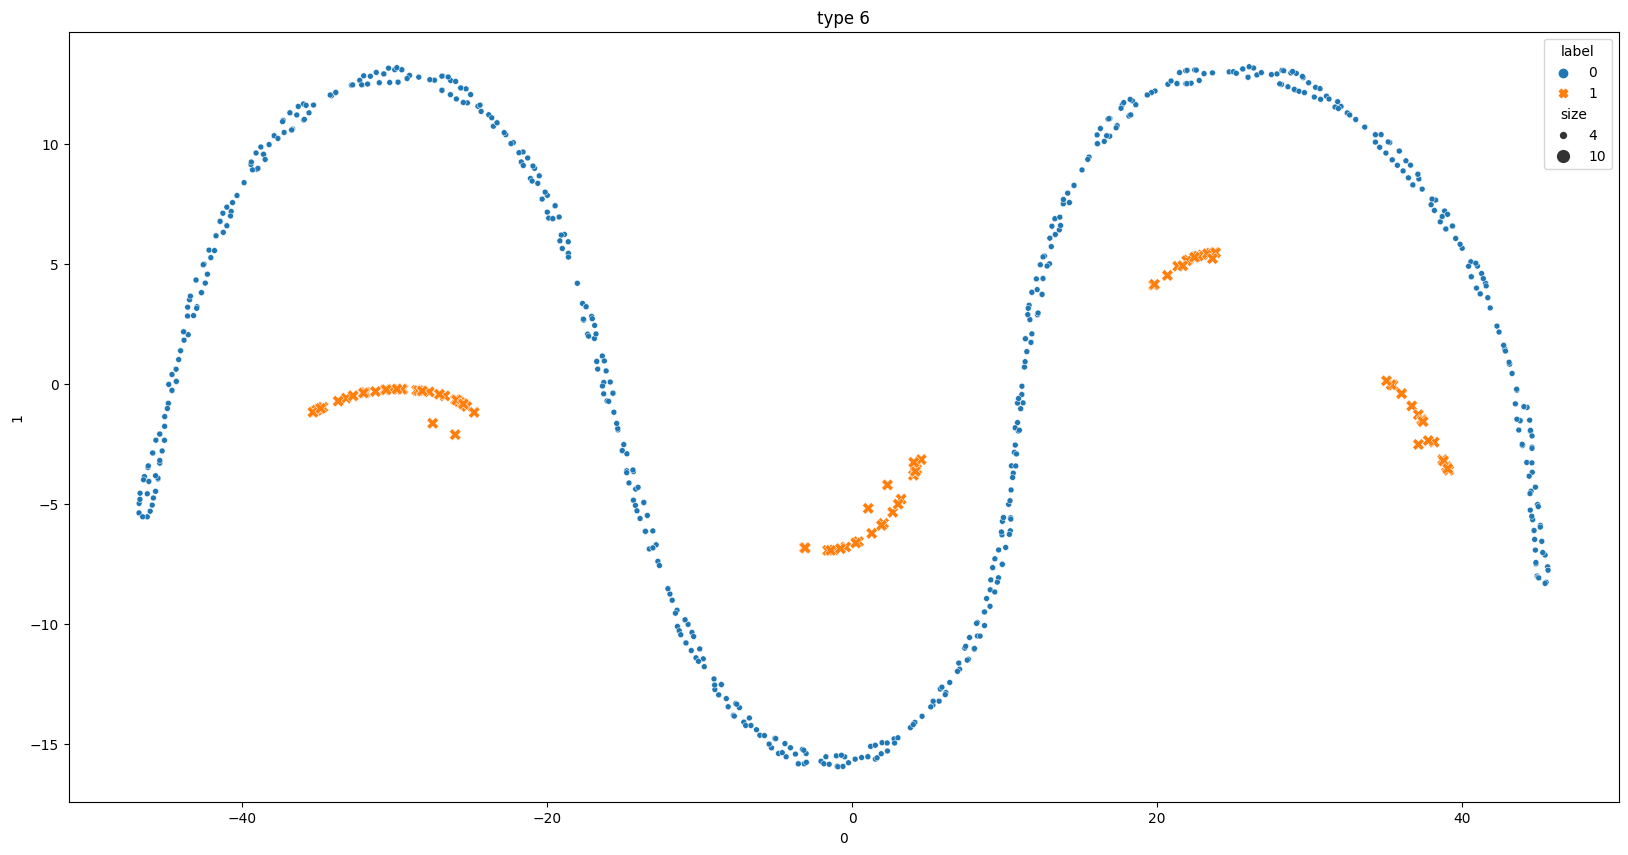

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test6_scaled_tsne[0], y=test6_scaled_tsne[1], data=test6_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 6')
plt.show()

In [ ]:
test.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

In [ ]:
print(test6_scaled_pca['label'].reset_index(drop=True)[test6_scaled_pca['label'].reset_index(drop=True)==1].index[:50])
print(test6_scaled_pca['label'].reset_index(drop=True)[test6_scaled_pca['label'].reset_index(drop=True)==1].index[50:])

Int64Index([616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628,
            629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641,
            642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,
            655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665],
           dtype='int64')
Int64Index([666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678,
            679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691,
            692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
            705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716],
           dtype='int64')


In [ ]:
len(test6_scaled_pca)

747

In [ ]:
for i in range(19):
    plt.figure(figsize=(20,8))
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['air_inflow']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_inflow')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['air_end_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_end_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['motor_current']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_current')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['motor_rpm']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_rpm')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['motor_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==6]['motor_vibe']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_vibe')
    plt.legend()
    plt.title(f'{40*(i)} ~ {40*(i+1)}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### type 7

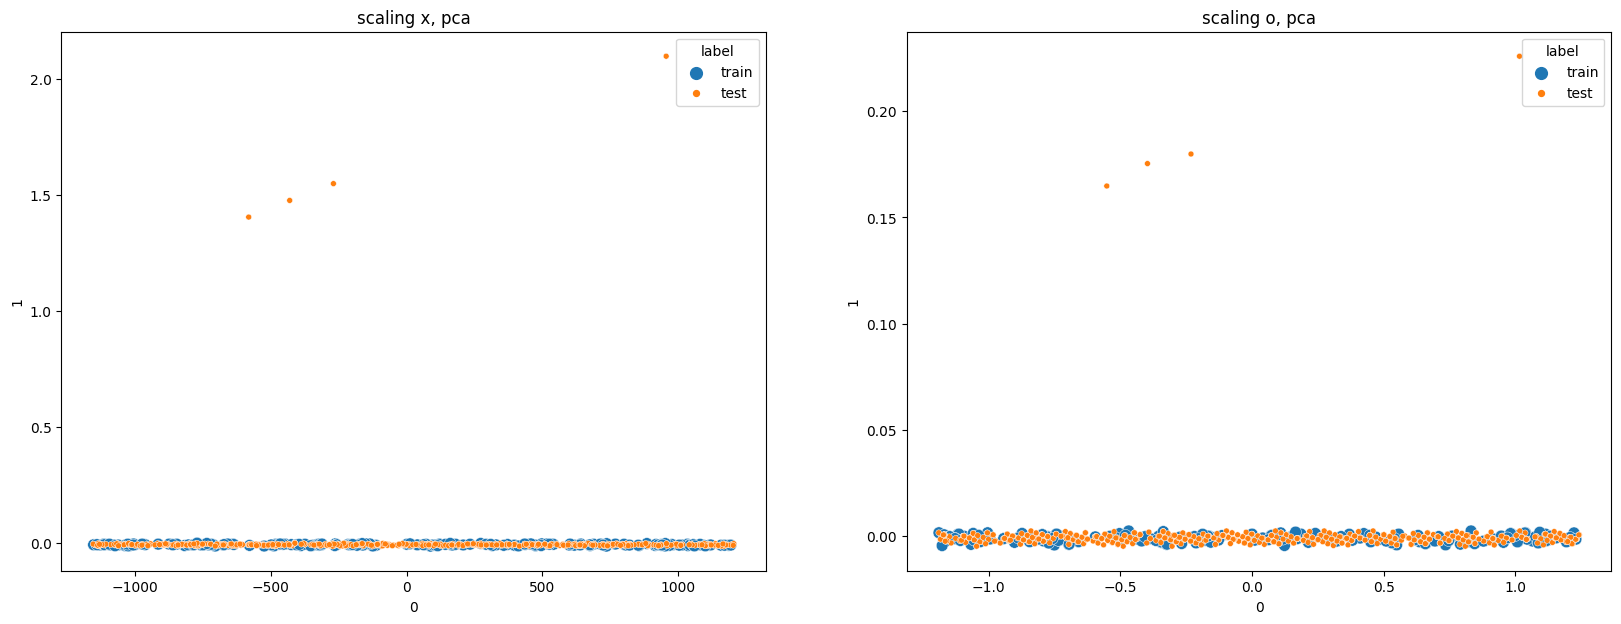

In [29]:
# all7 : pca(scaling x / scaling o)
all7_pca = pca.fit_transform(all7)
all7_pca = pd.DataFrame(all7_pca)
all7_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all7_pca[0], y=all7_pca[1], data=all7_pca, hue='label', size='label')
plt.title('scaling x, pca')

all7_scaled_pca = pca.fit_transform(scaler.fit_transform(all7))
all7_scaled_pca = pd.DataFrame(all7_scaled_pca)
all7_scaled_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.subplot(1,2,2)
sns.scatterplot(x=all7_scaled_pca[0], y=all7_scaled_pca[1], data=all7_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [30]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train7_scaled_pca = all7_scaled_pca[all7_scaled_pca['label']=='train']
test7_scaled_pca = all7_scaled_pca[all7_scaled_pca['label']=='test']

reg7 = LinearRegression()
reg7.fit(train7_scaled_pca[0].values.reshape(-1,1), train7_scaled_pca[1])

test7_scaled_pca['diff'] = abs(reg7.coef_ * test7_scaled_pca[0] + reg7.intercept_ - test7_scaled_pca[1])

<ipython-input-30-4197abb8e9cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7_scaled_pca['diff'] = abs(reg7.coef_ * test7_scaled_pca[0] + reg7.intercept_ - test7_scaled_pca[1])


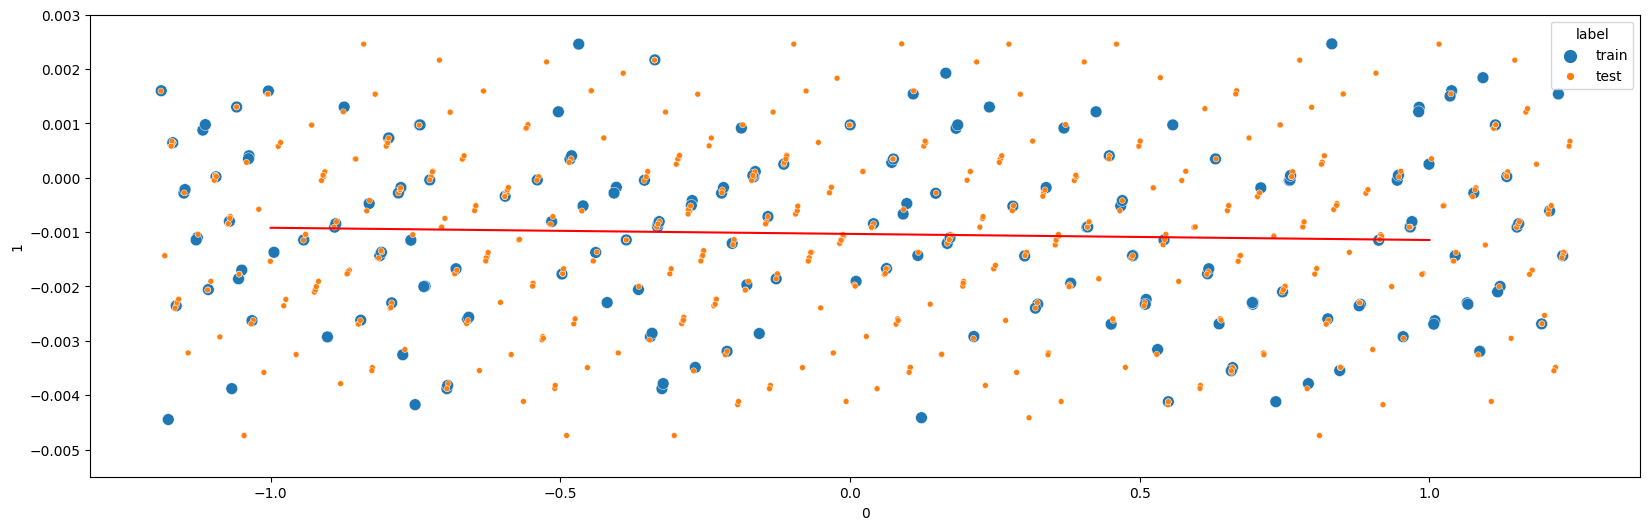

In [31]:
X = np.array(range(-1,2))
plt.figure(figsize=(20,6))
sns.scatterplot(x=all7_scaled_pca[0], y=all7_scaled_pca[1], data=all7_scaled_pca, hue='label', size='label')
plt.plot(X, reg7.coef_ * X + reg7.intercept_, color='red')
plt.ylim([-0.0055,0.003])
plt.show()

KeyboardInterrupt: ignored

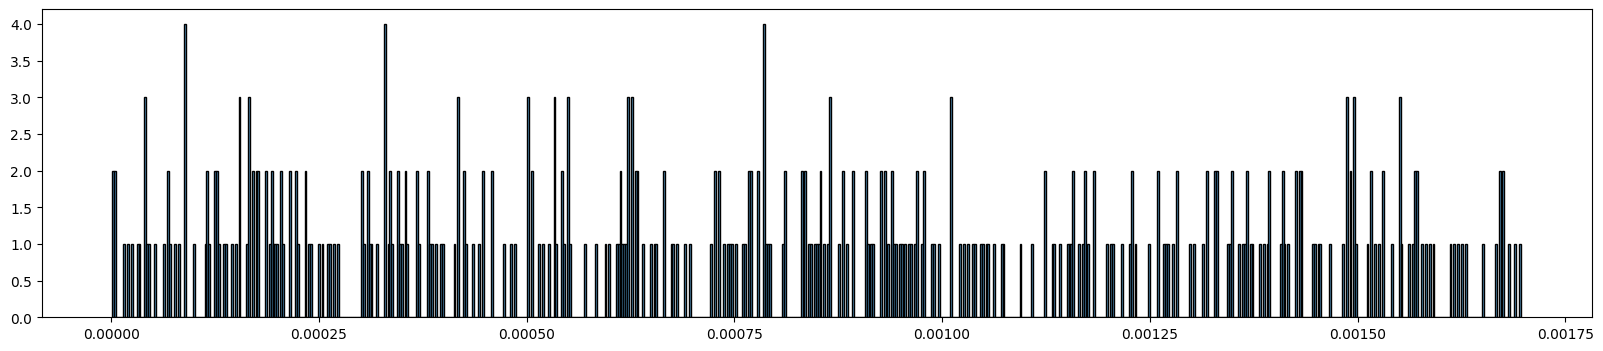

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test7_scaled_pca, bins=100000)
plt.xlim([0,0.005])
plt.show() # 0.004 이상이면 이상치

In [ ]:
# 이상치 판단
test7_scaled_pca['label'] = np.where(test7_scaled_pca['diff'] > 0.004, 1, 0)
test7_scaled_pca['label'].value_counts()

<ipython-input-6-a1ff4076b250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7_scaled_pca['label'] = np.where(test7_scaled_pca['diff'] > 0.004, 1, 0)


0    554
1      4
Name: label, dtype: int64

In [ ]:
test7_scaled_tsne = tsne.fit_transform(scaler.fit_transform(test[test['type']==7].drop('type', axis=1)))
test7_scaled_tsne = pd.DataFrame(test7_scaled_tsne)
test7_scaled_tsne.index = test7_scaled_pca.index
test7_scaled_tsne = pd.concat([test7_scaled_tsne, test7_scaled_pca['label']], axis=1)
test7_scaled_tsne['size'] = np.where(test7_scaled_tsne['label']==1, 10, 4)

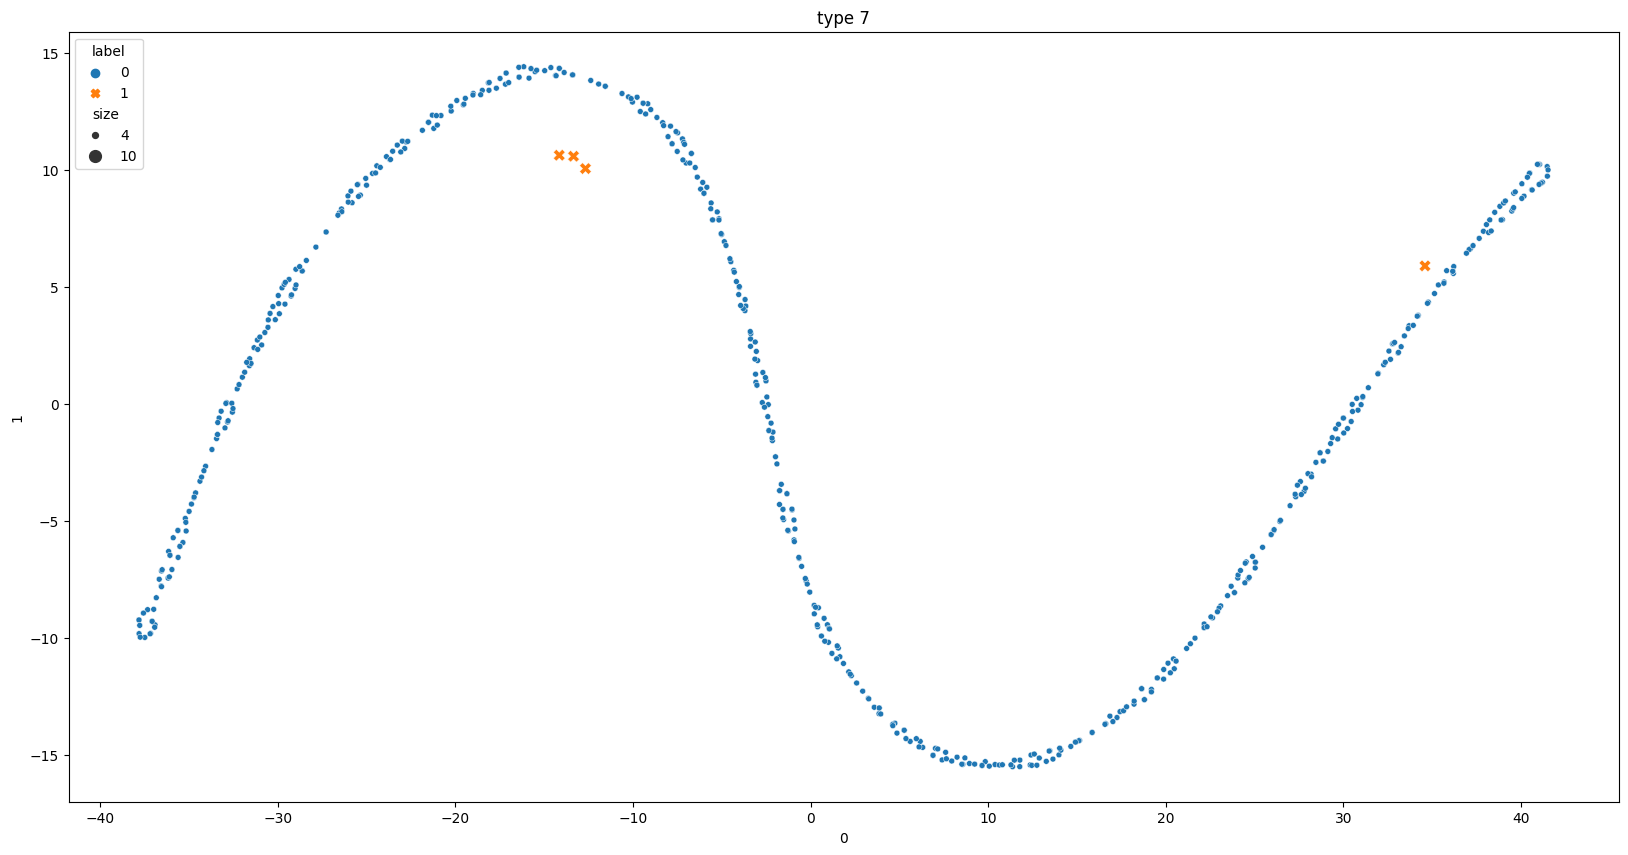

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=test7_scaled_tsne[0], y=test7_scaled_tsne[1], data=test7_scaled_tsne, hue='label', style='label', size='size')
plt.title('type 7')
#plt.xlim([-9,-7])
plt.show()

In [ ]:
test7_scaled_pca.reset_index(drop=True, inplace=True)
test7_scaled_pca[test7_scaled_pca['label']==1].index # type7 이상치 인덱스

Int64Index([511, 517, 528, 529], dtype='int64')

In [ ]:
len(test[test['type']==7])

558

In [ ]:
plt.figure(figsize=(20,140))
for i in range(14):
    plt.subplot(14,1,i+1)
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['air_inflow']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_inflow')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['air_end_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='air_end_temp')
    #plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['out_pressure']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='out_pressure')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['motor_current']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_current')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['motor_rpm']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_rpm')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['motor_temp']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_temp')
    plt.plot(scaler.fit_transform(np.array(test[test['type']==7]['motor_vibe']).reshape(-1,1))[40*(i):40*(i+1)], marker='o', markersize=3, label='motor_vibe')
    plt.legend()
    plt.title(f'{40*(i)} ~ {40*(i+1)}')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### answer file

In [ ]:
answer = pd.concat([test0_scaled_pca['label'], test1_scaled_pca['label'], test2_scaled_pca['label'], test3_scaled_pca['label'], test4_scaled_pca['label'],
                    test5_scaled_pca['label'], test6_scaled_pca['label'], test7_scaled_pca['label']]).reset_index(drop=True)
answer = pd.concat([test['type'], answer], axis=1)
answer.to_csv('answer.csv', index=False)

In [ ]:
sum(answer['label'] == 1)

345

In [ ]:
len(answer)

7389

## 모든 타입 PCA

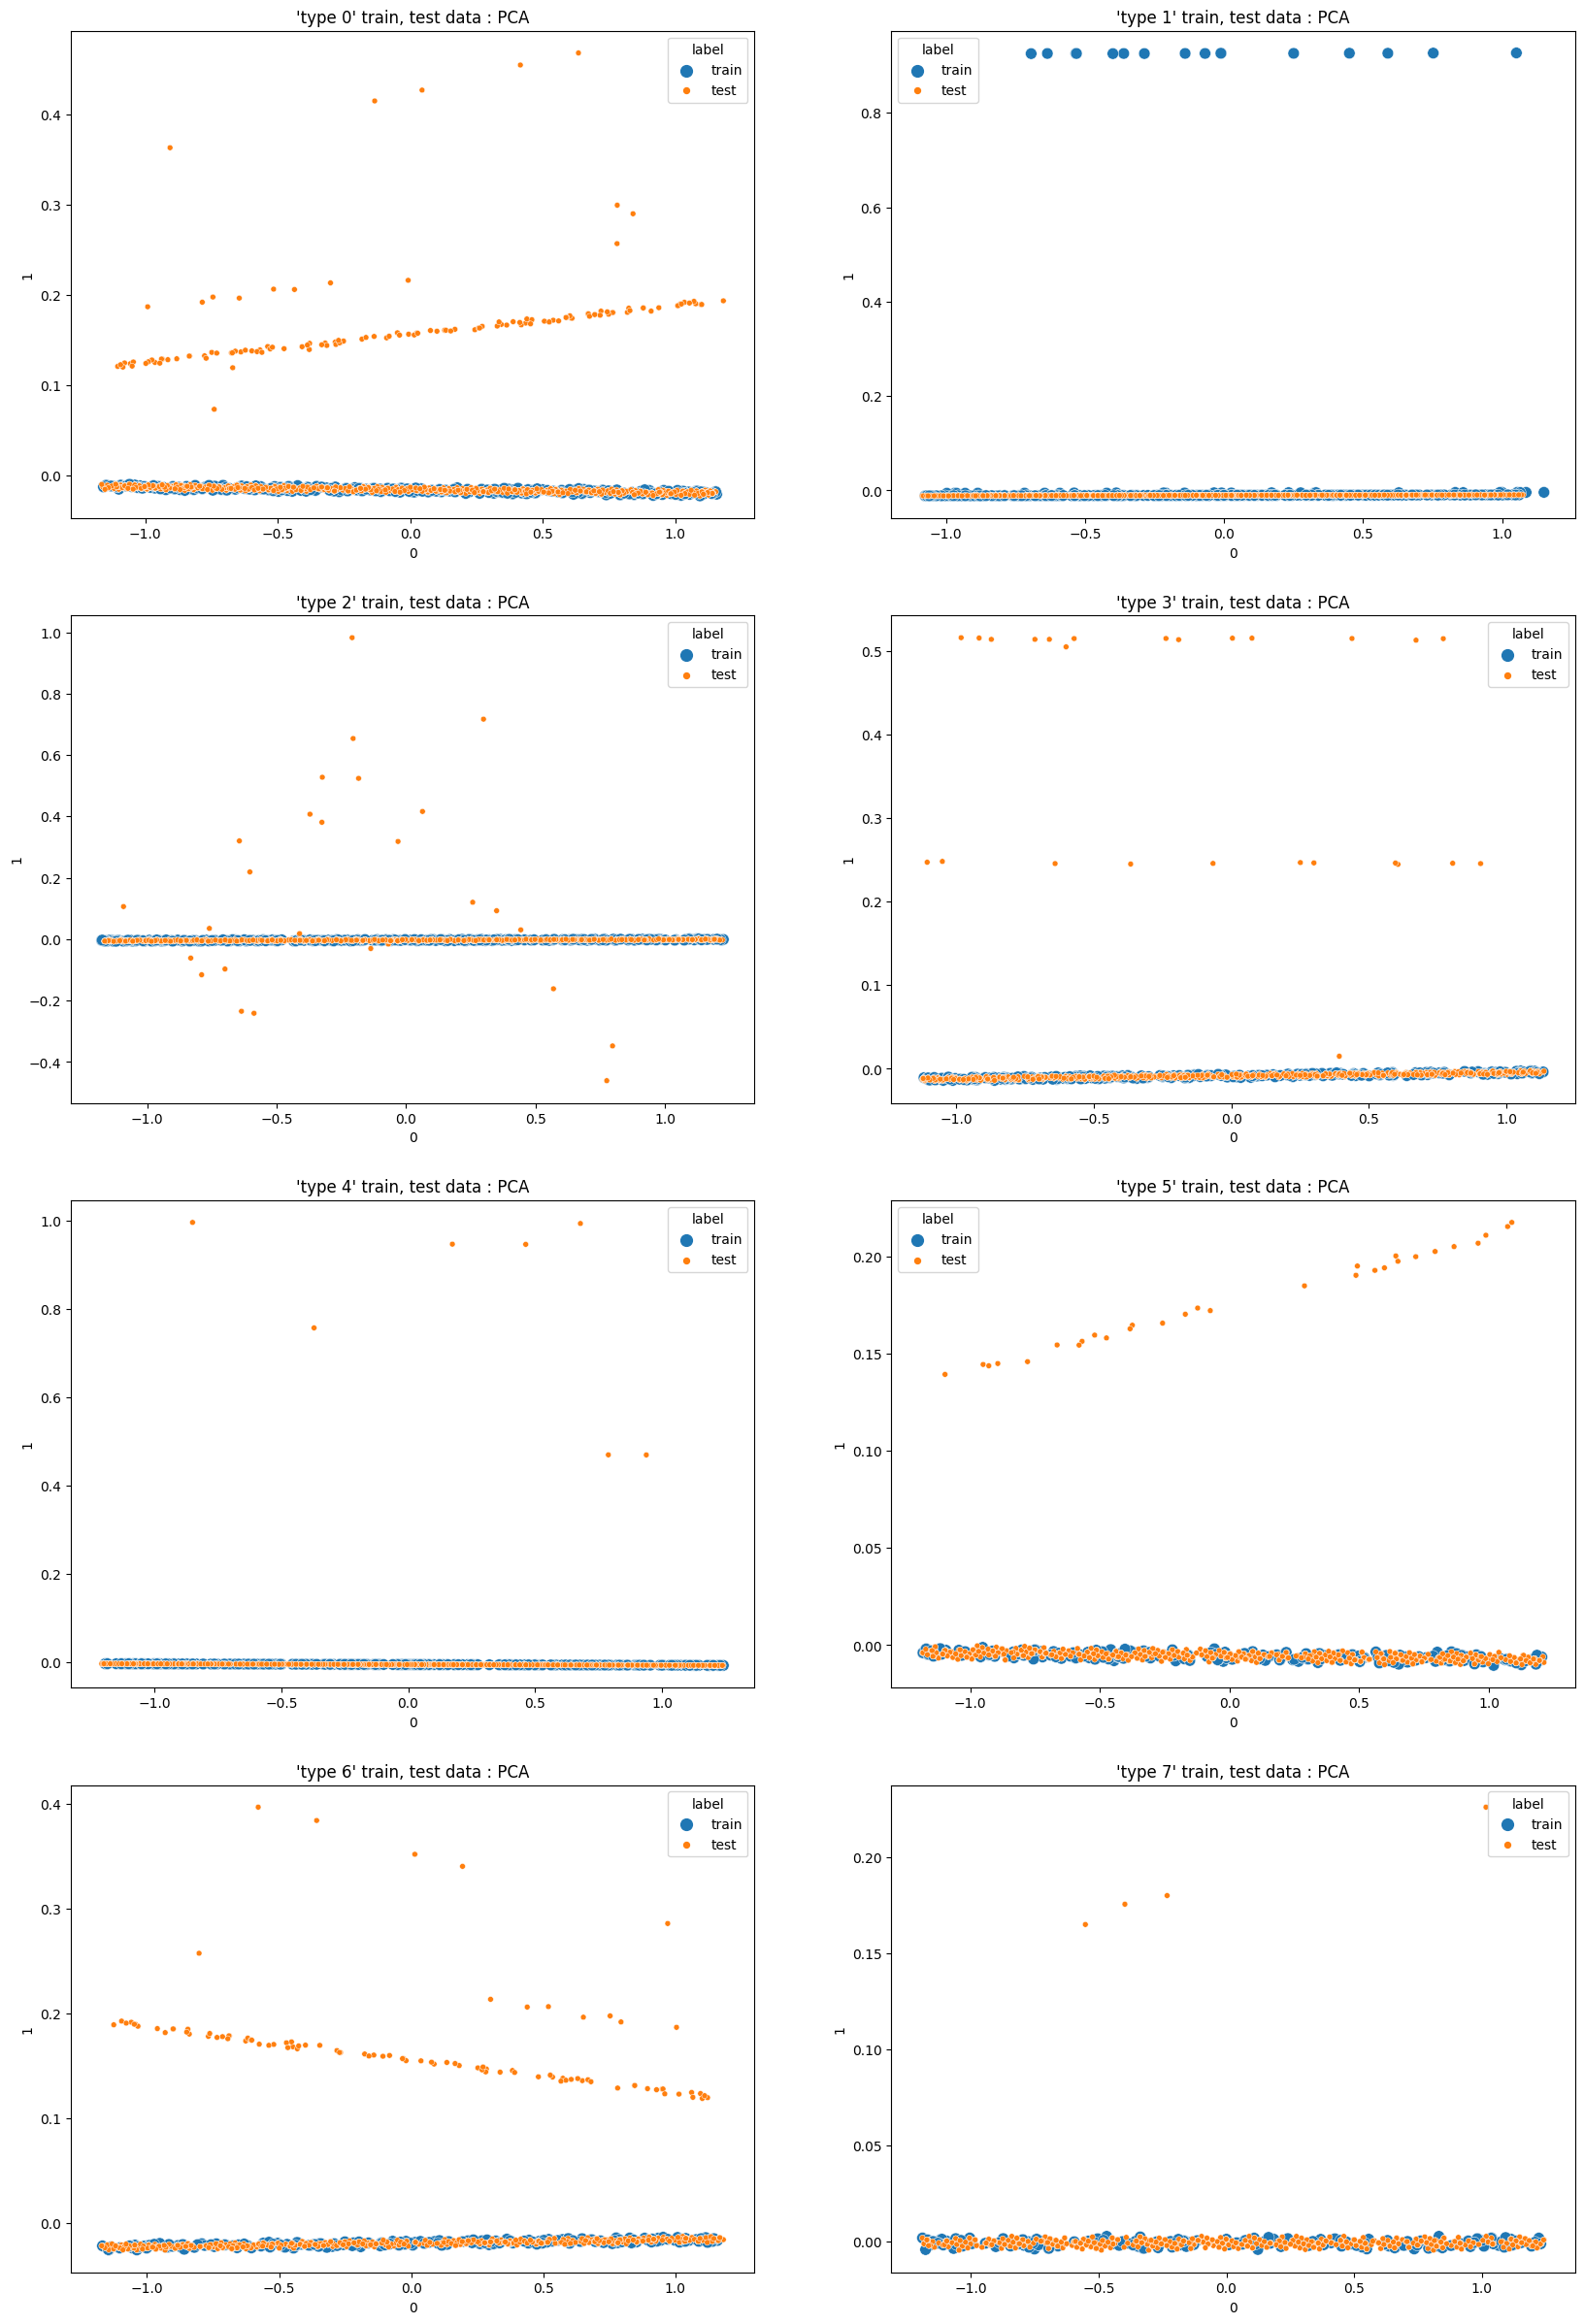

In [35]:
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
sns.scatterplot(x=all0_scaled_pca[0], y=all0_scaled_pca[1], data=all0_scaled_pca, hue='label', size='label')
plt.title("'type 0' train, test data : PCA")
plt.subplot(4,2,2)
sns.scatterplot(x=all1_scaled_pca[0], y=all1_scaled_pca[1], data=all1_scaled_pca, hue='label', size='label')
plt.title("'type 1' train, test data : PCA")
plt.subplot(4,2,3)
sns.scatterplot(x=all2_scaled_pca[0], y=all2_scaled_pca[1], data=all2_scaled_pca, hue='label', size='label')
plt.title("'type 2' train, test data : PCA")
plt.subplot(4,2,4)
sns.scatterplot(x=all3_scaled_pca[0], y=all3_scaled_pca[1], data=all3_scaled_pca, hue='label', size='label')
plt.title("'type 3' train, test data : PCA")
plt.subplot(4,2,5)
sns.scatterplot(x=all4_scaled_pca[0], y=all4_scaled_pca[1], data=all4_scaled_pca, hue='label', size='label')
plt.title("'type 4' train, test data : PCA")
plt.subplot(4,2,6)
sns.scatterplot(x=all5_scaled_pca[0], y=all5_scaled_pca[1], data=all5_scaled_pca, hue='label', size='label')
plt.title("'type 5' train, test data : PCA")
plt.subplot(4,2,7)
sns.scatterplot(x=all6_scaled_pca[0], y=all6_scaled_pca[1], data=all6_scaled_pca, hue='label', size='label')
plt.title("'type 6' train, test data : PCA")
plt.subplot(4,2,8)
sns.scatterplot(x=all7_scaled_pca[0], y=all7_scaled_pca[1], data=all7_scaled_pca, hue='label', size='label')
plt.title("'type 7' train, test data : PCA")
plt.show()